## **A. Introduction**

---

# **Customer Segmentation Using Clustering**

Nama  : Iznia Azyati

Batch : RMT-032

---
Program ini dibuat untuk melakukan Clustering data set dari data informasi 
penggunaan kartu kredit selama 6 bulan untuk melihat sifat penggunaan kartu
kredit berdasarkan cluster yang terbentuk. 

**Problem Statement**

Sebuah perusahaan bank kesulitan secara efektif untuk menargetkan dan memahami nasabahnya yang beragam terkait kebutuhan dan preferensi spesifik nasabah. Oleh karena itu, perusahaan ini melakukan Customer Segmentation dari informasi kartu kredit. Data ini berisi informasi pengguna kartu kredit selama 6 bulan terakhir, antara lain saldo, pola pembelanjaan, limit kredit, perilaku pembayaran, dan detail lainnya.

Untuk mengatasi tantangan ini, perusahaan memerlukan model yang mampu mengelompokkan pelanggan berdasarkan aktivitas dan karakteristik terkait kredit mereka.

Data ini akan digunakan untuk melakukan Customer Segmentation menggunakan **algoritma K-Means**.

**Objective**

Program ini bertujuan untuk mengembangkan model pengelompokan menggunakan algoritma **`K-Means`** untuk membangun model clustering, termasuk pemilihan jumlah cluster optimal menggunakan **Elbow Method dan Silhouette Method** untuk mensegmentasi pelanggan berdasarkan aktivitas dan karakteristik terkait kredit mereka. Tujuannya adalah untuk mengidentifikasi kelompok nasabah yang berbeda dengan perilaku dan preferensi yang sama, sehingga memungkinkan perusahaan untuk memberikan layanan dan strategi pemasaran mereka secara lebih efektif.

---


## **B. Query SQL**

In [232]:
'''
SELECT * FROM `ftds-hacktiv8-project.phase1_ftds_032_rmt.credit-card-information`
WHERE MOD(CUST_ID, 2) = 0;
'''

'\nSELECT * FROM `ftds-hacktiv8-project.phase1_ftds_032_rmt.credit-card-information`\nWHERE MOD(CUST_ID, 2) = 0;\n'

## **C. Import Libraries**

Install library yang belum ada

In [233]:
!pip install kmodes yellowbrick

Libraries yang digunakan untuk analisi model, antara lain:

In [234]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns


# Import libraries for data preprocessing
from feature_engine.outliers import Winsorizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA

# Import libraries for modelling and visualization
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples
from yellowbrick.cluster import SilhouetteVisualizer

# Saving models
import pickle
import json

# Import libraries to hide warnings
import warnings
warnings.filterwarnings('ignore')   # untuk menghapus pesan warning.

## **D. Data Loading**

Data pertama kali dimuat dari file CSV yang sebelumnya disimpan dari Google BigQuery.

In [235]:
# Dataset loading
dataset = pd.read_csv('P1G6_Set_1_Iznia_Azyati.csv')

# Duplicate dataset
df = dataset.copy()

# Show data
df

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0         788    16.581535           0.125000     200.00              0.00   
1        1902   943.584041           0.875000     103.00            103.00   
2        2322     1.979916           0.125000      80.00             80.00   
3        3426   461.455720           1.000000     585.00            585.00   
4        3976  1053.594730           1.000000    1450.00           1450.00   
...       ...          ...                ...        ...               ...   
4470     4630  1079.008102           1.000000       0.00              0.00   
4471     8614   809.582978           0.909091       0.00              0.00   
4472     4296  3386.490883           1.000000     560.98            427.22   
4473     4476  4840.545574           1.000000    1595.93           1595.93   
4474     3564  1977.007090           1.000000    1032.04            226.90   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                     200.00      0.000000             0.125000   
1                       0.00      0.000000             0.125000   
2                       0.00      0.000000             0.125000   
3                       0.00      0.000000             0.125000   
4                       0.00      0.000000             0.125000   
...                      ...           ...                  ...   
4470                    0.00   1259.571764             0.000000   
4471                    0.00   3819.672466             0.000000   
4472                  133.76   2008.153534             1.000000   
4473                    0.00   4359.325750             0.454545   
4474                  805.14   4335.919227             0.909091   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                       0.000000                          0.125000   
1                       0.125000                          0.000000   
2                       0.125000                          0.000000   
3                       0.125000                          0.000000   
4                       0.125000                          0.000000   
...                          ...                               ...   
4470                    0.000000                          0.000000   
4471                    0.000000                          0.000000   
4472                    0.727273                          0.363636   
4473                    0.454545                          0.000000   
4474                    0.090909                          0.818182   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                   0.000000                 0              2        1200.0   
1                   0.000000                 0              1        1000.0   
2                   0.000000                 0              1        1500.0   
3                   0.000000                 0              1        1000.0   
4                   0.000000                 0              1        1500.0   
...                      ...               ...            ...           ...   
4470                0.545455                 9              0        1200.0   
4471                0.545455                 7              0        4150.0   
4472                0.545455                 9             20       10100.0   
4473                0.545455                17             25        6000.0   
4474                0.545455                21             17        4000.0   

         PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0        0.000000               NaN          0.000000       8  
1      215.325023        410.484825          0.000000       8  
2        0.000000               NaN          0.000000       8  
3      258.032630        151.696433          0.000000       8  
4      397.090516        227.143184          0.000000       8  
...           ...               ...               ...     ...  
4470  1379.635287        2

Outputnya menampilkan 10 data pertama dari kumpulan data, yang memberikan rincian informasi kartu kredit nasabah. Insight lebih lanjut dapat diperoleh dengan explore 10 data terakhir.

In [236]:
# Show 10 data pertama
df.head(10)

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0      788    16.581535           0.125000      200.0               0.0   
1     1902   943.584041           0.875000      103.0             103.0   
2     2322     1.979916           0.125000       80.0              80.0   
3     3426   461.455720           1.000000      585.0             585.0   
4     3976  1053.594730           1.000000     1450.0            1450.0   
5     4266  2237.238086           1.000000      120.0             120.0   
6     4360  2730.843802           1.000000     2900.0            2900.0   
7     4680   424.994385           0.375000     1200.0            1200.0   
8     5884    18.885677           0.375000       57.0              57.0   
9       24     0.004816           0.545455       51.7               0.0   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                   200.0           0.0                0.125   
1                     0.0           0.0                0.125   
2                     0.0           0.0                0.125   
3                     0.0           0.0                0.125   
4                     0.0           0.0                0.125   
5                     0.0           0.0                0.125   
6                     0.0           0.0                0.125   
7                     0.0           0.0                0.125   
8                     0.0           0.0                0.125   
9                    51.7           0.0                0.250   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                       0.000                             0.125   
1                       0.125                             0.000   
2                       0.125                             0.000   
3                       0.125                             0.000   
4                       0.125                             0.000   
5                       0.125                             0.000   
6                       0.125                             0.000   
7                       0.125                             0.000   
8                       0.125                             0.000   
9                       0.000                             0.250   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                     0.0                 0              2        1200.0   
1                     0.0                 0              1        1000.0   
2                     0.0                 0              1        1500.0   
3                     0.0                 0              1        1000.0   
4                     0.0                 0              1        1500.0   
5                     0.0                 0              1        2500.0   
6                     0.0                 0              1        2900.0   
7                     0.0                 0              1        1200.0   
8                     0.0                 0              1        1500.0   
9                     0.0                 0              3        3000.0   

     PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0    0.000000               NaN               0.0       8  
1  215.325023        410.484825               0.0       8  
2    0.000000               NaN               0.0       8  
3  258.032630        151.696433               0.0       8  
4  397.090516        227.143184               0.0       8  
5  343.102984        712.986387               0.0       8  
6    0.000000               NaN               0.0       8  
7   57.266292         56.720210               0.0       8  
8    0.000000               NaN               0.0       8  
9   33.249088          0.059481               0.0      12

In [237]:
# Show 10 data terakhir
df.tail(10)

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
4465     1588   538.768762           0.909091     226.95            129.58   
4466     6900  7468.012010           1.000000    1569.41            796.07   
4467     2528   427.642111           0.888889       0.00              0.00   
4468     1226   706.327578           0.888889     169.54            169.54   
4469     2152  1420.727073           1.000000       0.00              0.00   
4470     4630  1079.008102           1.000000       0.00              0.00   
4471     8614   809.582978           0.909091       0.00              0.00   
4472     4296  3386.490883           1.000000     560.98            427.22   
4473     4476  4840.545574           1.000000    1595.93           1595.93   
4474     3564  1977.007090           1.000000    1032.04            226.90   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
4465                   97.37    452.009130             0.545455   
4466                  773.34   4500.288676             0.545455   
4467                    0.00   2563.705644             0.000000   
4468                    0.00   1406.735573             0.333333   
4469                    0.00    311.804499             0.000000   
4470                    0.00   1259.571764             0.000000   
4471                    0.00   3819.672466             0.000000   
4472                  133.76   2008.153534             1.000000   
4473                    0.00   4359.325750             0.454545   
4474                  805.14   4335.919227             0.909091   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
4465                    0.090909                          0.454545   
4466                    0.454545                          0.363636   
4467                    0.000000                          0.000000   
4468                    0.333333                          0.000000   
4469                    0.000000                          0.000000   
4470                    0.000000                          0.000000   
4471                    0.000000                          0.000000   
4472                    0.727273                          0.363636   
4473                    0.454545                          0.000000   
4474                    0.090909                          0.818182   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
4465                0.272727                 8              9        1200.0   
4466                0.272727                 7             10        8700.0   
4467                0.888889                62              0        1200.0   
4468                0.888889                14              3        2500.0   
4469                0.900000                 9              0        1500.0   
4470                0.545455                 9              0        1200.0   
4471                0.545455                 7              0        4150.0   
4472                0.545455                 9             20       10100.0   
4473                0.545455                17             25        6000.0   
4474                0.545455                21             17        4000.0   

         PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
4465   946.649324        211.220001          0.000000      11  
4466  2162.943350       4628.802111          0.000000      11  
4467  2853.967334        146.976542          0.500000       9  
4468   302.976780        142.597254          0.000000       9  
4469   506.765033        449.179818          0.000000      10  
4470  1379.635287        271.364415          0.090909      11  
4471  4372.148648        241.645387          0.090909      11  
4472  1039.000037        886.050237          0.000000      11  
4473   905.844846       2376.919568          0.090909      11  
4474  3056.424974        910.707525          0.090909      11

Outputnya menampilkan 10 data terakhir dataset. Mengamati awal dan akhir dari dataset menunjukkan bahwa kolom kategori tertentu sudah dikodekan secara numerik.

Dibawah ini informasi tabel terkait deskripsi di tiap kolom. 

<center>

| **Column Name**                    | **Data Type**                 | **Description**                                             |
|------------------------------------|-------------------------------|-------------------------------------------------------------|
| `CUST_ID`                            | Numerical                     | Identification of Credit Card holder                        |
| `BALANCE`                            | Numerical                     | Balance amount left in their account to make purchases      |
| `BALANCE_FREQUENCY`                  | Categorical Encoded           | How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)|
| `PURCHASES`                          | Numerical                     | Amount of purchases made from account                       |
| `ONEOFF_PURCHASES`                   | Numerical                     | Maximum purchase amount done in one-go                      |
| `INSTALLMENTS_PURCHASES`             | Numerical                     | Amount of purchase done in installment                      |
| `CASH_ADVANCE`                       | Numerical                     | Cash in advance given by the user                           |
| `PURCHASES_FREQUENCY`                | Categorical Encoded           | How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)|
| `ONEOFF_PURCHASES_FREQUENCY`         | Categorical Encoded           | How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased)|
| `PURCHASES_INSTALLMENTS_FREQUENCY`   | Categorical Encoded           | How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)|
| `CASH_ADVANCE_FREQUENCY`             | Categorical Encoded           | How frequently the cash in advance being paid (1 = frequently done, 0 = not frequently done)|
| `CASH_ADVANCE_TRX`                   | Numerical                     | Number of Transactions made with 'Cash in Advanced'         |
| `PURCHASES_TRX`                      | Numerical                     | Number of purchase transactions made                        |
| `CREDIT_LIMIT`                       | Numerical                     | Limit of Credit Card for user                               |
| `PAYMENTS`                           | Numerical                     | Amount of Payment done by user                              |
| `MINIMUM_PAYMENTS`                   | Numerical                     | Minimum amount of payments made by user                     |
| `PRC_FULL_PAYMENT`                   | Numerical                     | Percent of full payment paid by user                        |
| `TENURE`                             | Numerical                     | Tenure of credit card service for user                      |

</center>

In [238]:
# Check shape of the dataset
print("Shape of the dataset:", df.shape)

Shape of the dataset: (4475, 18)


Pada dataset ini terdapat 4475 baris dengan 18 kolom

Untuk insight data yang lebih mendalam, method `info` digunakan untuk memeriksa informasi ringkasan kumpulan data.

In [239]:
# Memeriksa summary informasi data

# Display informasi data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4475 entries, 0 to 4474
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           4475 non-null   int64  
 1   BALANCE                           4475 non-null   float64
 2   BALANCE_FREQUENCY                 4475 non-null   float64
 3   PURCHASES                         4475 non-null   float64
 4   ONEOFF_PURCHASES                  4475 non-null   float64
 5   INSTALLMENTS_PURCHASES            4475 non-null   float64
 6   CASH_ADVANCE                      4475 non-null   float64
 7   PURCHASES_FREQUENCY               4475 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        4475 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  4475 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            4475 non-null   float64
 11  CASH_ADVANCE_TRX                  4475 non-null   int64  
 12  PURCHA

**Explanation :**
- Dataset terdiri dari 18 kolom dan 4475 baris.
- Tipe data terdiri dari 14 kolom float dan 4 kolom integer.
- Ada missing values di kolom `MINIMUM_PAYMENTS` dan `CREDIT_LIMIT`.

In [240]:
# Check missing values
print("Missing values in each column:")
df.isnull().sum().sort_values(ascending=False)

Missing values in each column:


MINIMUM_PAYMENTS                    158
CREDIT_LIMIT                          1
CUST_ID                               0
BALANCE                               0
PRC_FULL_PAYMENT                      0
PAYMENTS                              0
PURCHASES_TRX                         0
CASH_ADVANCE_TRX                      0
CASH_ADVANCE_FREQUENCY                0
PURCHASES_INSTALLMENTS_FREQUENCY      0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_FREQUENCY                   0
CASH_ADVANCE                          0
INSTALLMENTS_PURCHASES                0
ONEOFF_PURCHASES                      0
PURCHASES                             0
BALANCE_FREQUENCY                     0
TENURE                                0
dtype: int64

**Explanation :**
- Ada 158 missing values pada kolom `MINIMUM_PAYMENTS` dan 1 pada kolom `CREDIT_LIMIT`.
- Handling missing value akan dilakukan pada proses selanjutnya. 

In [241]:
# Memeriksa keberadaan data duplikat
df.duplicated().any()

False

In [242]:
# Menghitung jumlah data duplikat
df.duplicated().sum()

0

Tidak ada data yang duplikat dalam dataset. 

**Central Tendency Data Check**

In [243]:
# Descriptive Statistics Check
df.describe().T

count         mean          std  \
CUST_ID                           4475.0  4476.000000  2583.931114   
BALANCE                           4475.0  1565.743939  2091.205727   
BALANCE_FREQUENCY                 4475.0     0.877608     0.235604   
PURCHASES                         4475.0  1003.158324  2210.812899   
ONEOFF_PURCHASES                  4475.0   588.504849  1666.500287   
INSTALLMENTS_PURCHASES            4475.0   415.025075   927.360842   
CASH_ADVANCE                      4475.0   973.453671  2133.464502   
PURCHASES_FREQUENCY               4475.0     0.490122     0.399874   
ONEOFF_PURCHASES_FREQUENCY        4475.0     0.202614     0.298502   
PURCHASES_INSTALLMENTS_FREQUENCY  4475.0     0.364989     0.397336   
CASH_ADVANCE_FREQUENCY            4475.0     0.134156     0.199221   
CASH_ADVANCE_TRX                  4475.0     3.196425     6.500169   
PURCHASES_TRX                     4475.0    14.490503    24.156038   
CREDIT_LIMIT                      4474.0  4494.020175  3668.535689   
PAYMENTS                          4475.0  1726.212274  2961.258570   
MINIMUM_PAYMENTS                  4317.0   854.429538  2306.411178   
PRC_FULL_PAYMENT                  4475.0     0.157206     0.295869   
TENURE                            4475.0    11.516425     1.347819   

                                         min          25%          50%  \
CUST_ID                             2.000000  2239.000000  4476.000000   
BALANCE                             0.000000   132.536353   874.905296   
BALANCE_FREQUENCY                   0.000000     0.888889     1.000000   
PURCHASES                           0.000000    40.065000   362.480000   
ONEOFF_PURCHASES                    0.000000     0.000000    29.990000   
INSTALLMENTS_PURCHASES              0.000000     0.000000    89.450000   
CASH_ADVANCE                        0.000000     0.000000     0.000000   
PURCHASES_FREQUENCY                 0.000000     0.083333     0.500000   
ONEOFF_PURCHASES_FREQUENCY          0.000000     0.000000     0.083333   
PURCHASES_INSTALLMENTS_FREQUENCY    0.000000     0.000000     0.166667   
CASH_ADVANCE_FREQUENCY              0.000000     0.000000     0.000000   
CASH_ADVANCE_TRX                    0.000000     0.000000     0.000000   
PURCHASES_TRX                       0.000000     1.000000     7.000000   
CREDIT_LIMIT                      150.000000  1500.000000  3000.000000   
PAYMENTS                            0.000000   390.206371   831.048408   
MINIMUM_PAYMENTS                    0.037744   169.814310   309.854995   
PRC_FULL_PAYMENT                    0.000000     0.000000     0.000000   
TENURE                              6.000000    12.000000    12.000000   

                                          75%           max  
CUST_ID                           6713.000000   8950.000000  
BALANCE                           2058.519163  19043.138560  
BALANCE_FREQUENCY                    1.000000      1.000000  
PURCHASES                         1122.640000  49039.570000  
ONEOFF_PURCHASES                   580.320000  40761.250000  
INSTALLMENTS_PURCHASES             484.255000  22500.000000  
CASH_ADVANCE                      1098.569962  29282.109150  
PURCHASES_FREQUENCY                  0.916667      1.000000  
ONEOFF_PURCHASES_FREQUENCY           0.333333      1.000000  
PURCHASES_INSTALLMENTS_FREQUENCY     0.750000      1.000000  
CASH_ADVANCE_FREQUENCY               0.181818      1.166667  
CASH_ADVANCE_TRX                     4.000000    110.000000  
PURCHASES_TRX                       17.000000    358.000000  
CREDIT_LIMIT                      6000.000000  30000.000000  
PAYMENTS                          1895.959003  46930.598240  
MINIMUM_PAYMENTS                   830.395060  61031.618600  
PRC_FULL_PAYMENT                     0.166667      1.000000  
TENURE                              12.000000     12.000000

**Explanation :**  

- Kolom yang memiliki Standar Deviasi terkecil adalah `CASH_ADVANCE_FREQUENCY` dan yang terbesar adalah `CREDIT_LIMIT`.
- Rata-rata pelanggan mempertahankan saldo sekitar 1565.74, namun ini sangat bervariasi sebagaimana ditunjukkan oleh standar deviasi sebesar 2091.21. Median saldo adalah 874.91, menunjukkan distribusi yang tidak merata dengan beberapa saldo tinggi mempengaruhi rata-rata.
- Pembelian angsuran rata-rata sebesar 415.03, dengan standar deviasi sebesar 927.36. Median adalah 89.45, menunjukkan distribusi yang tidak merata dengan beberapa nilai besar.

Secara keseluruhan, data menunjukkan berbagai macam perilaku pelanggan dan aktivitas keuangan. Distribusi yang tidak merata di beberapa kolom menunjukkan bahwa beberapa nilai tinggi secara signifikan mempengaruhi rata-rata. 

In [244]:
# Check column to list  
df.columns.tolist()

['CUST_ID',
 'BALANCE',
 'BALANCE_FREQUENCY',
 'PURCHASES',
 'ONEOFF_PURCHASES',
 'INSTALLMENTS_PURCHASES',
 'CASH_ADVANCE',
 'PURCHASES_FREQUENCY',
 'ONEOFF_PURCHASES_FREQUENCY',
 'PURCHASES_INSTALLMENTS_FREQUENCY',
 'CASH_ADVANCE_FREQUENCY',
 'CASH_ADVANCE_TRX',
 'PURCHASES_TRX',
 'CREDIT_LIMIT',
 'PAYMENTS',
 'MINIMUM_PAYMENTS',
 'PRC_FULL_PAYMENT',
 'TENURE']

In [245]:
# Check total unique values
df.nunique()

CUST_ID                             4475
BALANCE                             4439
BALANCE_FREQUENCY                     42
PURCHASES                           3218
ONEOFF_PURCHASES                    2073
INSTALLMENTS_PURCHASES              2357
CASH_ADVANCE                        2155
PURCHASES_FREQUENCY                   47
ONEOFF_PURCHASES_FREQUENCY            44
PURCHASES_INSTALLMENTS_FREQUENCY      47
CASH_ADVANCE_FREQUENCY                46
CASH_ADVANCE_TRX                      55
PURCHASES_TRX                        147
CREDIT_LIMIT                         153
PAYMENTS                            4350
MINIMUM_PAYMENTS                    4317
PRC_FULL_PAYMENT                      47
TENURE                                 7
dtype: int64

Kolom yang memiliki nilai unik terkecil adalah `TENURE` dan yang terbesar adalah `CUST_ID`.

**Data Cleaning**

Setelah explor kumpulan data, selanjutnya yaitu data cleaning untuk menyederhanakan proses yaitu dengan men-drop kolom `CUST ID`.

In [246]:
# Remove columns for identifier
df = df.drop('CUST_ID', axis=1)

**Data Checking**

Ini dilakukan untuk memastikan apakah kolom sudah dihilangkan dan proses cleaning telah selesai. Dilakukan verifikasi dengan memeriksa kembali summary data dengan `info`

In [247]:
# Last check data summary
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4475 entries, 0 to 4474
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           4475 non-null   float64
 1   BALANCE_FREQUENCY                 4475 non-null   float64
 2   PURCHASES                         4475 non-null   float64
 3   ONEOFF_PURCHASES                  4475 non-null   float64
 4   INSTALLMENTS_PURCHASES            4475 non-null   float64
 5   CASH_ADVANCE                      4475 non-null   float64
 6   PURCHASES_FREQUENCY               4475 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        4475 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  4475 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            4475 non-null   float64
 10  CASH_ADVANCE_TRX                  4475 non-null   int64  
 11  PURCHASES_TRX                     4475 non-null   int64  
 12  CREDIT

Sekarang datasetnya berisi 17 kolom dan tidak ada kolom `CUST_ID`, ini mengonfirmasi bahwa proses telah berhasil diselesaikan.

## **E. Exploratory Data Analysis (EDA)**

Melakukan eksplorasi data dan visaulisasi data untuk memahami struktur dan karakteristik dataset.

##### **i. Memeriksa Struktur Dataset**

In [248]:
# Memeriksa ukuran dataset
print(f"Dataset contains {df.shape[0]} rows and {df.shape[1]} columns.")

# Menampilkan nama kolom dan tipe data
print("\nColumn names and data types:")
print(df.dtypes)

# Menampilkan 5 baris pertama dari dataset
print("\nFirst 5 rows of the dataset:")
print(df.head())


Dataset contains 4475 rows and 17 columns.

Column names and data types:
BALANCE                             float64
BALANCE_FREQUENCY                   float64
PURCHASES                           float64
ONEOFF_PURCHASES                    float64
INSTALLMENTS_PURCHASES              float64
CASH_ADVANCE                        float64
PURCHASES_FREQUENCY                 float64
ONEOFF_PURCHASES_FREQUENCY          float64
PURCHASES_INSTALLMENTS_FREQUENCY    float64
CASH_ADVANCE_FREQUENCY              float64
CASH_ADVANCE_TRX                      int64
PURCHASES_TRX                         int64
CREDIT_LIMIT                        float64
PAYMENTS                            float64
MINIMUM_PAYMENTS                    float64
PRC_FULL_PAYMENT                    float64
TENURE                                int64
dtype: object

First 5 rows of the dataset:
       BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0    16.581535              0.125      200.0               0.0   
1  

**Explanation:**
- Dataset terdiri dari 4475 baris dan 17 kolom. Dataset ini cukup besar untuk analisis clustering, yang memungkinkan identifikasi pola penggunaan kartu kredit dari berbagai pengguna.
- Sebagian besar fitur merupakan nilai kontinu, yang cocok untuk analisis clustering. Kolom int64 menunjukkan bahwa beberapa fitur diukur dalam bentuk frekuensi atau jumlah transaksi.
- Nilai dalam kolom seperti `BALANCE` dan `PURCHASES` bervariasi secara signifikan, menunjukkan perbedaan perilaku pengguna kartu kredit.


##### **ii. Visualisasi Distribusi Kolom Numerik**

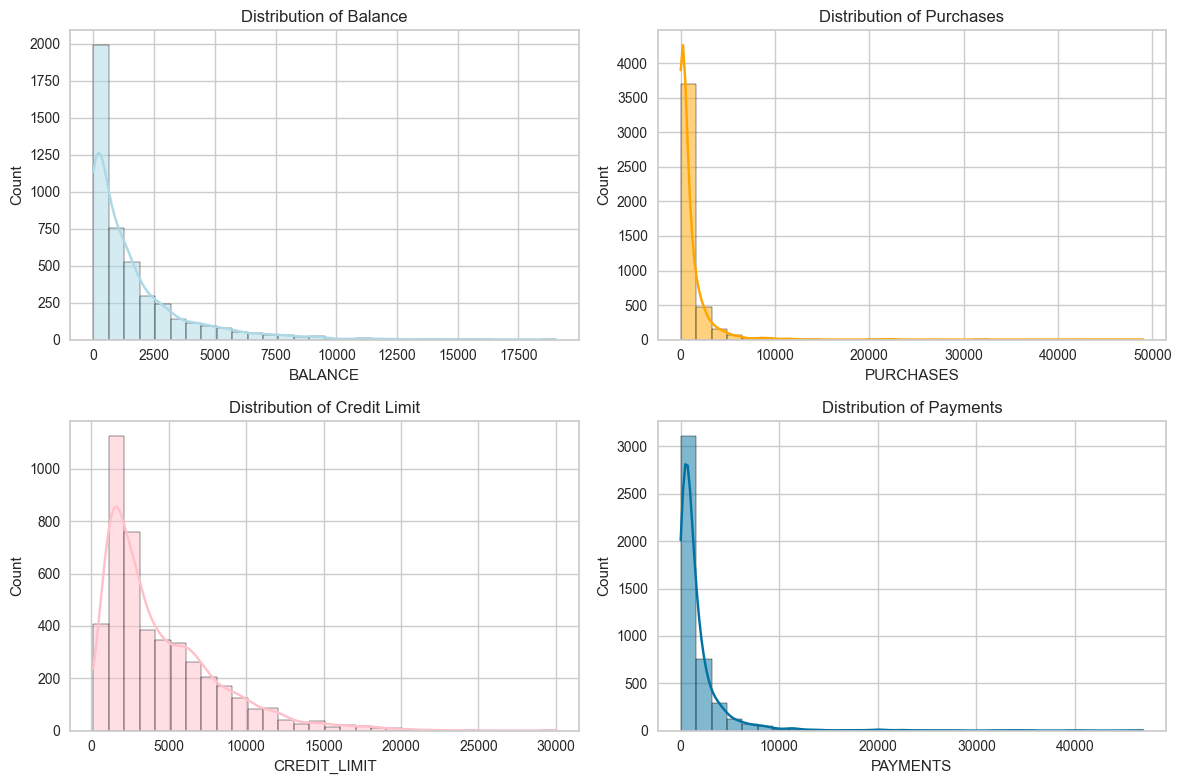

In [249]:
# Create a figure and 4 subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# Plotting histograms for each variable
sns.histplot(df['BALANCE'], bins=30, kde=True, color='lightblue', ax=axes[0, 0])
axes[0, 0].set_title('Distribution of Balance')

sns.histplot(df['PURCHASES'], bins=30, kde=True, color='orange', ax=axes[0, 1])
axes[0, 1].set_title('Distribution of Purchases')

sns.histplot(df['CREDIT_LIMIT'], bins=30, kde=True, color='pink', ax=axes[1, 0])
axes[1, 0].set_title('Distribution of Credit Limit')

sns.histplot(df['PAYMENTS'], bins=30, kde=True, ax=axes[1, 1])
axes[1, 1].set_title('Distribution of Payments')

# Show result
plt.tight_layout()
plt.show()


**Explanation:**
- **Balance** : Sebagian besar saldo kartu kredit berada pada kisaran rendah (0 hingga 2500). Frekuensi saldo menurun drastis seiring dengan meningkatnya jumlah saldo.
- **Purchase** : Distribusi pembelian juga menunjukkan pola yang serupa dengan saldo (balance), di mana sebagian besar pengguna melakukan pembelian dengan jumlah yang relatif rendah (0 hingga 5000).
- **Credit Limit** : Mayoritas pengguna diberikan batas kredit yang rendah hingga menengah. Hal ini bisa menunjukkan profil risiko pengguna yang dinilai lebih rendah atau kebijakan pemberian kredit yang konservatif oleh bank.
- **Payments** : Kebanyakan pengguna melakukan pembayaran rutin dalam jumlah yang lebih kecil, yang mungkin mencerminkan upaya mereka untuk menghindari bunga dengan membayar saldo kartu kredit secara penuh setiap bulan.

Sebagian besar pengguna memiliki saldo rendah, melakukan pembelian kecil, memiliki batas kredit yang rendah hingga menengah, dan melakukan pembayaran dalam jumlah kecil secara rutin. Informasi ini dapat membantu dalam segmentasi pengguna untuk tujuan pemasaran, manajemen risiko, dan pengembangan produk yang lebih sesuai dengan profil pengguna

##### **iii. Visualisasi Distribusi Kolom `TENURE`**

TENURE
12    3807
11     166
10     114
6      103
7      100
8       97
9       88
Name: count, dtype: int64


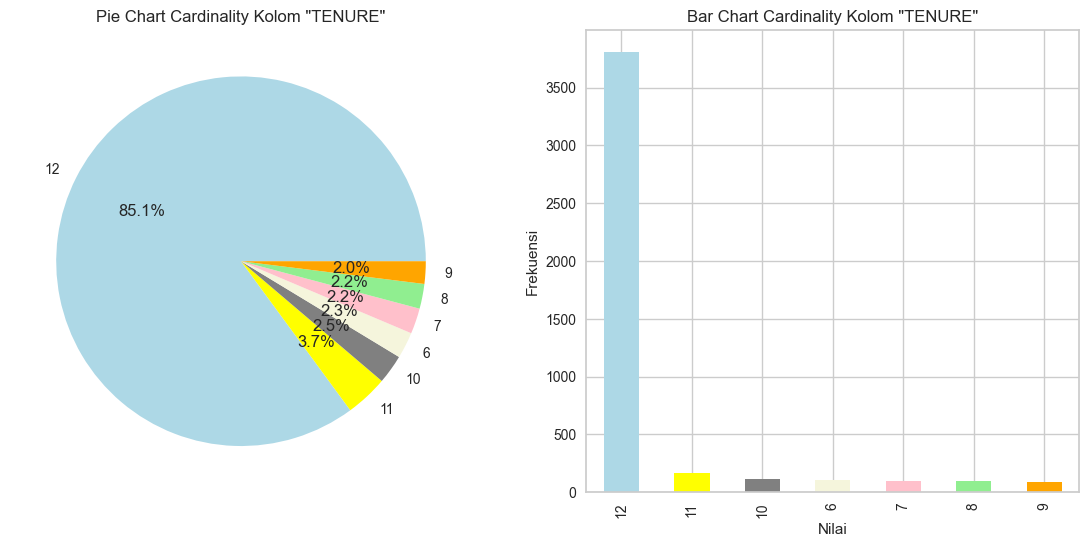

In [250]:
# Count the number of unique values in the 'TENURE' column
value_counts = df['TENURE'].value_counts()
print(value_counts)

# Create subplots for pie charts and bar charts
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))
colors = ['lightblue', 'yellow', 'grey', 'beige', 'pink', 'lightgreen', 'orange']

# Plotting pie chart
ax1.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', colors=colors)
ax1.set_title('Pie Chart Cardinality Kolom "TENURE"')

# Plotting bar chart
value_counts.plot(kind='bar', ax=ax2, color=colors)
ax2.set_title('Bar Chart Cardinality Kolom "TENURE"')
ax2.set_xlabel('Nilai')
ax2.set_ylabel('Frekuensi')

# Display the plot
plt.show()

**Insight:**
- Diagram pie menunjukkan bahwa nilai "12" mendominasi kolom "TENURE" dengan proporsi sebesar 85.1%. Nilai lainnya memiliki proporsi yang jauh lebih kecil. Hal ini mengindikasikan bahwa mayoritas pengguna memiliki durasi penggunaan kartu kredit selama 12 bulan.
- Nasabah dengan durasi penggunaan yang berbeda sangat jarang, yang mungkin menunjukkan bahwa kartu kredit baru saja diperkenalkan atau pengguna yang lebih lama telah bertransisi ke durasi 12 bulan.
- Hal ini dapat membantu dalam segmentasi pengguna berdasarkan durasi penggunaan kartu kredit dan strategi pemasaran yang lebih tepat sasaran.

##### **iv. Correlation Analysis**

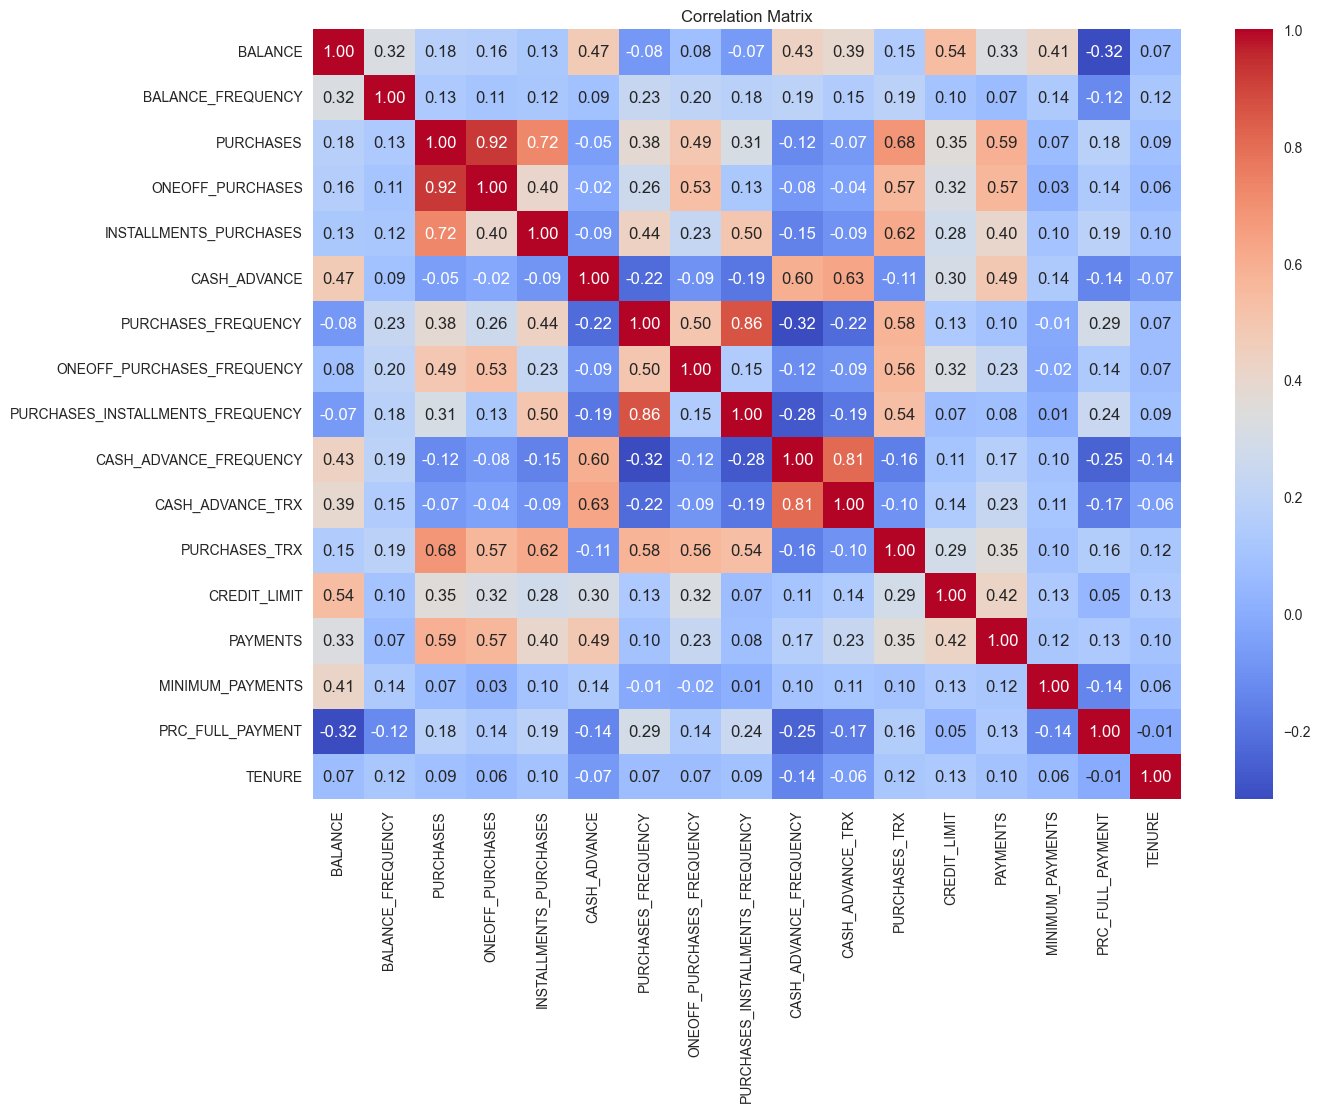

In [251]:
# Menampilkan matriks korelasi
correlation_matrix = df.corr()

# Plotting heatmap korelasi
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


Matriks korelasi yang ditampilkan menunjukkan berbagai hubungan antara parameter penggunaan kartu kredit yang berbeda. Warna biru menunjukkan korelasi lemah atau negatif antara variabel, sementara warna merah menunjukkan korelasi positif yang kuat.
- **Purchase vs Balance**: Korelasi lemah antara Purchase dan Balance menunjukkan bahwa memiliki `balance` yang tinggi tidak serta merta meningkatkan jumlah pembelian. Hal ini bisa berarti bahwa strategi lain, seperti penawaran insentif untuk pembelian lebih tinggi, mungkin diperlukan untuk meningkatkan pengeluaran pelanggan.
- **Purchases vs One-Off Purchases**: Matriks menunjukkan korelasi kuat antara total pembelian dan pembelian sekali jalan (koefisien mendekati 0.92), yang mengindikasikan bahwa pemegang kartu yang melakukan pembelian sekali jalan cenderung memberikan kontribusi yang signifikan terhadap volume pembelian total mereka.
- **Balance vs PRC_Full_Payment**: Terdapat korelasi negatif antara saldo (BALANCE) dan persentase pembayaran penuh (PRC_FULL_PAYMENT) sebesar (-0.32). Ini menunjukkan bahwa pengguna yang sering membayar saldo mereka secara penuh cenderung memiliki saldo yang lebih rendah.

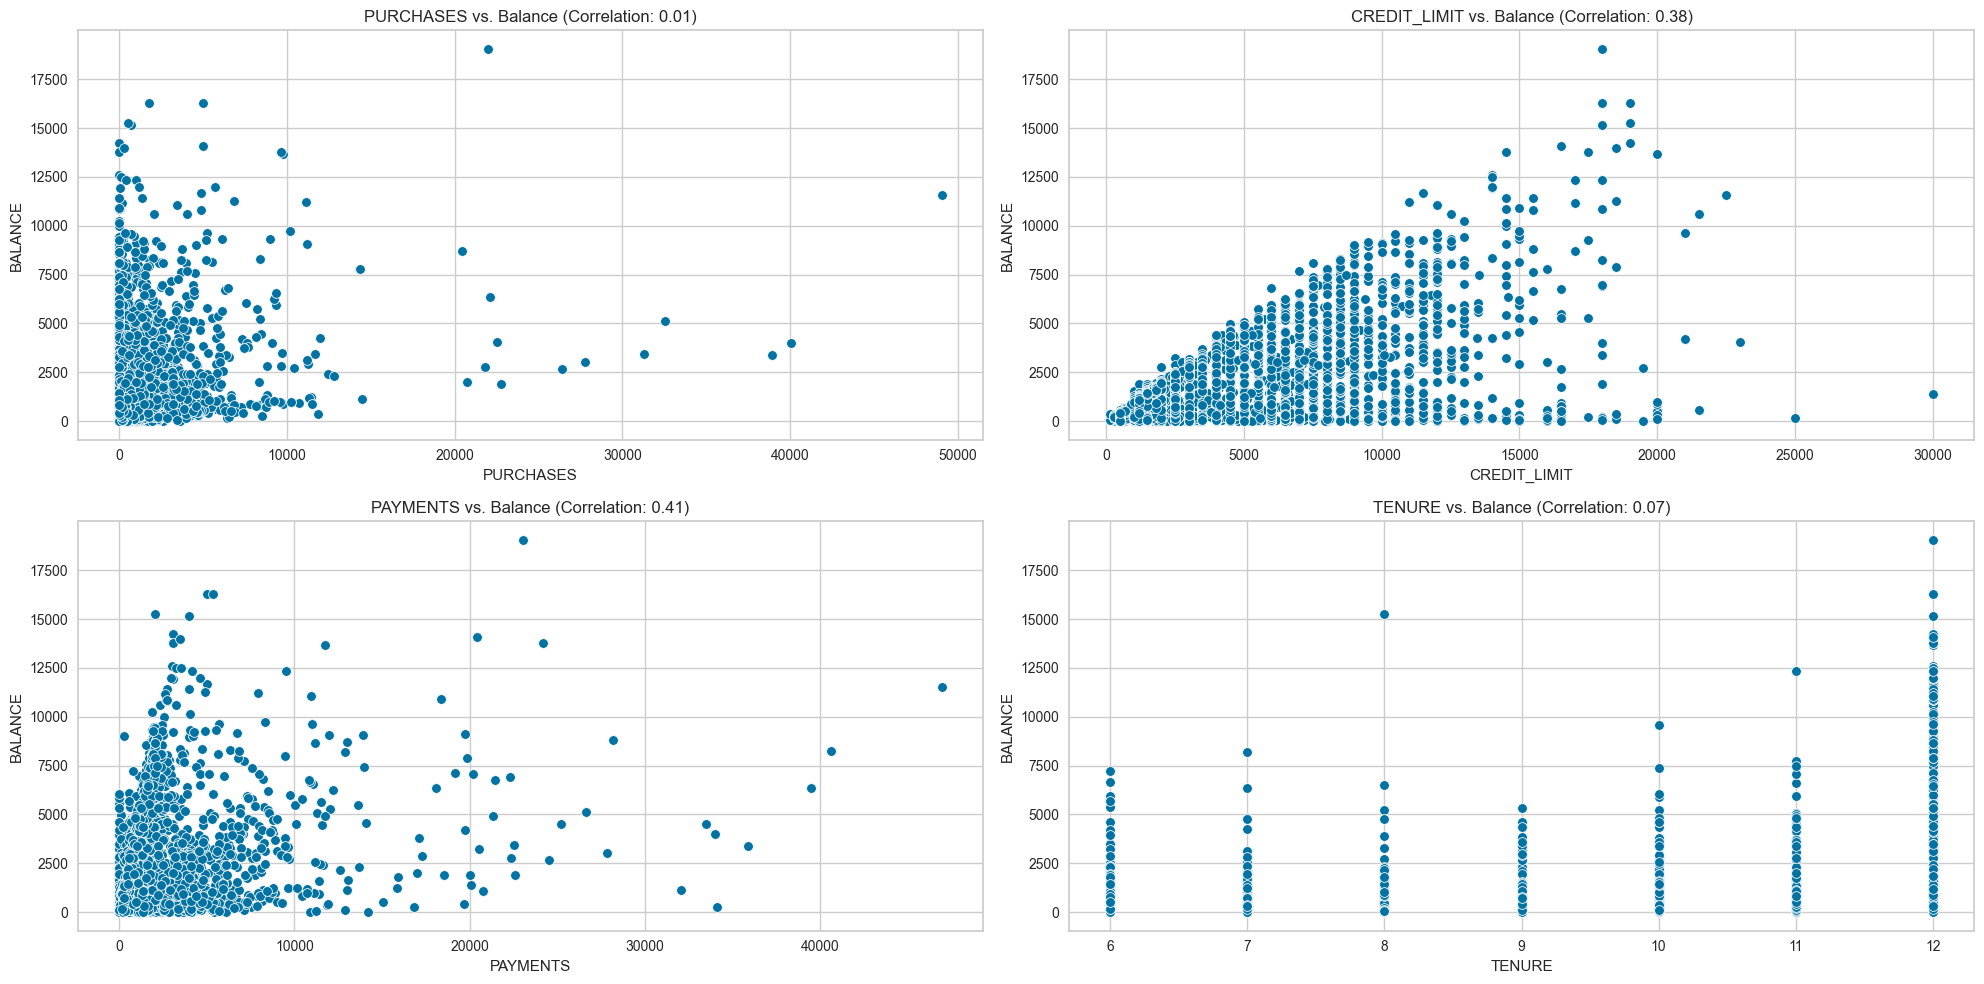

In [252]:
# List of features you're interested in
features = ['PURCHASES', 'CREDIT_LIMIT', 'PAYMENTS', 'TENURE']

# Create a subplot for each feature
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(20, 10))

for i, feature in enumerate(features):
    # Calculate the correlation between the feature and Balance
    correlation = df[feature].corr(df['BALANCE'], method='spearman')
    
    # Create a scatter plot of the feature vs. Balance
    sns.scatterplot(data=df, x=feature, y='BALANCE', ax=axs[i//2, i%2])
    
    # Set the title to include the correlation
    axs[i//2, i%2].set_title(f'{feature} vs. Balance (Correlation: {correlation:.2f})')

plt.tight_layout()
plt.show()

Insight:
- **PURCHASES vs BALANCE**: Korelasi yang sangat lemah (0.01) antara PURCHASES dan BALANCE menunjukkan bahwa jumlah pembelian tidak memiliki hubungan yang signifikan dengan saldo kartu kredit. Artinya, saldo yang tinggi tidak selalu diikuti dengan jumlah pembelian yang tinggi.
- **CREDIT_LIMIT vs BALANCE**: Terdapat korelasi positif sedang (0.38) antara CREDIT_LIMIT dan BALANCE. Ini menunjukkan bahwa pengguna dengan batas kredit yang lebih tinggi cenderung memiliki saldo yang lebih tinggi. 
- **PAYMENTS vs BALANCE (Korelasi: 0.41)**: Pengguna dengan saldo yang lebih tinggi cenderung melakukan pembayaran yang lebih besar, yang mungkin merupakan upaya untuk mengurangi saldo mereka.
- **TENURE vs BALANCE (Korelasi: 0.07)**: Durasi penggunaan kartu kredit tidak memiliki dampak signifikan terhadap saldo. Pengguna lama tidak selalu memiliki saldo yang lebih tinggi dibandingkan pengguna baru.



##### **v. Frequency Analysis**

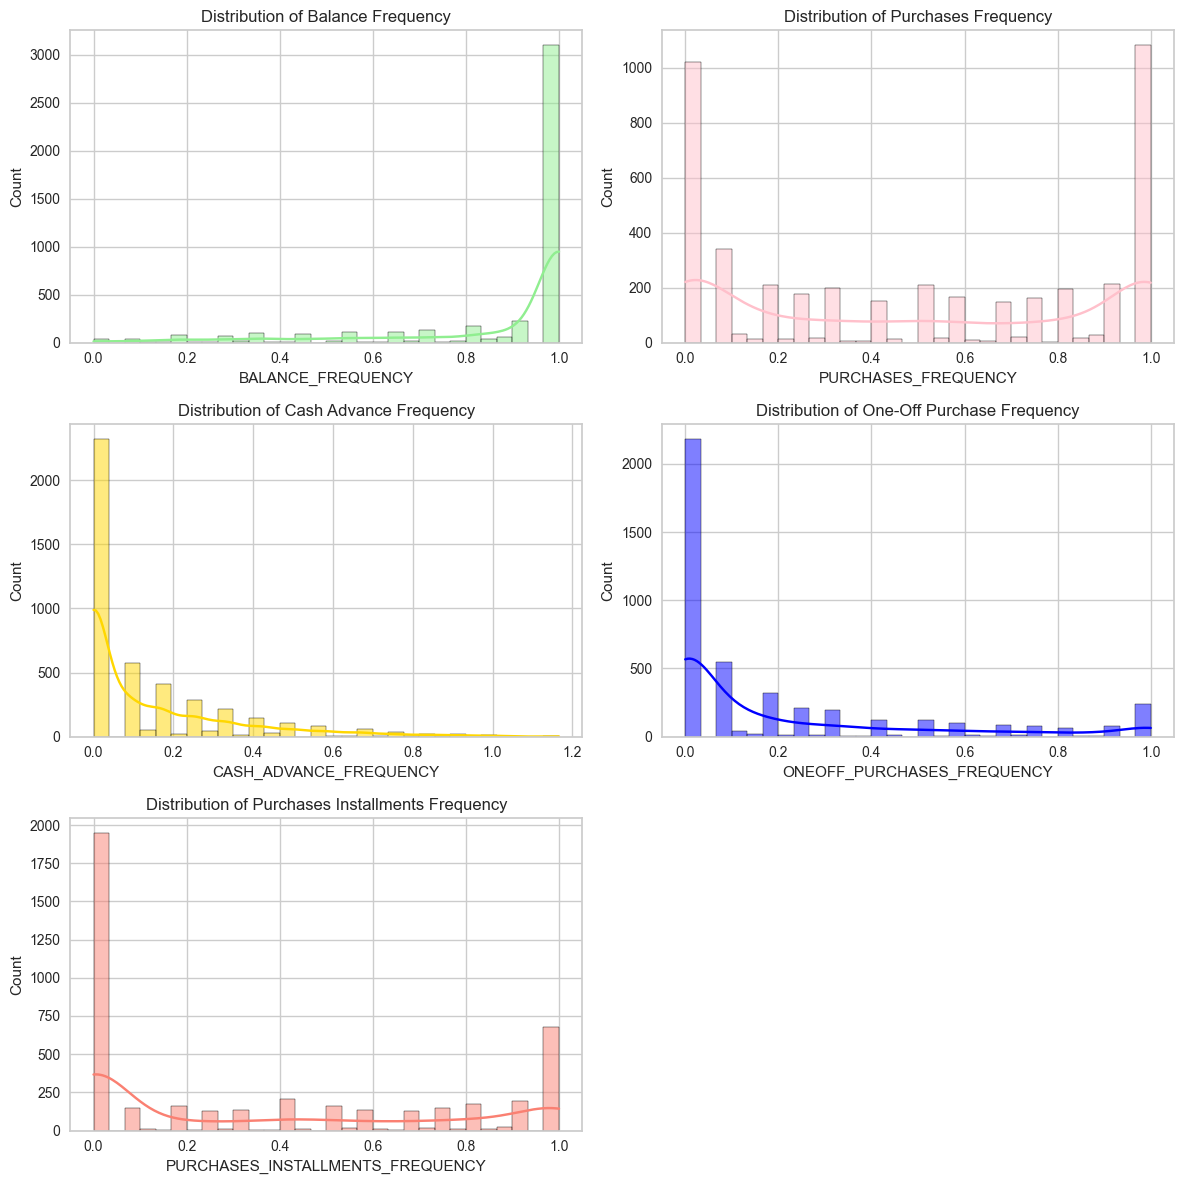

In [253]:
# Create a figure and subplots
fig, axes = plt.subplots(3, 2, figsize=(12, 12))

# Plotting histograms
sns.histplot(df['BALANCE_FREQUENCY'], bins=30, kde=True, color='lightgreen', ax=axes[0, 0])
axes[0, 0].set_title('Distribution of Balance Frequency')

sns.histplot(df['PURCHASES_FREQUENCY'], bins=30, kde=True, color='pink', ax=axes[0, 1])
axes[0, 1].set_title('Distribution of Purchases Frequency')

sns.histplot(df['CASH_ADVANCE_FREQUENCY'], bins=30, kde=True, color='gold', ax=axes[1, 0])
axes[1, 0].set_title('Distribution of Cash Advance Frequency')

sns.histplot(df['PURCHASES_INSTALLMENTS_FREQUENCY'], bins=30, kde=True, color='salmon', ax=axes[2, 0])
axes[2, 0].set_title('Distribution of Purchases Installments Frequency')

sns.histplot(df['ONEOFF_PURCHASES_FREQUENCY'], bins=30, kde=True, color='blue', ax=axes[1, 1])
axes[1, 1].set_title('Distribution of One-Off Purchase Frequency')

# Hapus subplot yang kosong
fig.delaxes(axes[2, 1])

# Display hasil
plt.tight_layout()
plt.show()

Visualisasi di atas menunjukkan distribusi dari beberapa frekuensi penggunaan kartu kredit dalam dataset. 
1. Distribution of Balance Frequency: Distribusi frekuensi saldo menunjukkan bahwa sebagian besar pengguna memiliki frekuensi saldo yang tinggi, mendekati 1. 

2. Distribution of Purchases Frequency:  Distribusi frekuensi pembelian menunjukkan dua puncak utama, satu di sekitar 0 dan satu di sekitar 1. Ini berarti ada dua kelompok pengguna: mereka yang jarang melakukan pembelian dan mereka yang sering melakukan pembelian.

3. Distribution of Cash Advance Frequency: Distribusi frekuensi penarikan tunai menunjukkan bahwa sebagian besar pengguna jarang melakukan penarikan tunai, dengan frekuensi mendekati 0.

4. Distribution of One-Off Purchase Frequency: Distribusi frekuensi pembelian sekali jalan menunjukkan bahwa sebagian besar pengguna jarang melakukan pembelian sekali jalan, dengan frekuensi mendekati 0.

5. Distribution of Purchases Installments Frequency: Distribusi frekuensi pembelian cicilan menunjukkan pola yang mirip dengan frekuensi pembelian, dengan dua puncak di sekitar 0 dan 1. Ini menunjukkan bahwa ada pengguna yang jarang dan sering melakukan pembelian cicilan.








##### **vi. Spending Patterns**

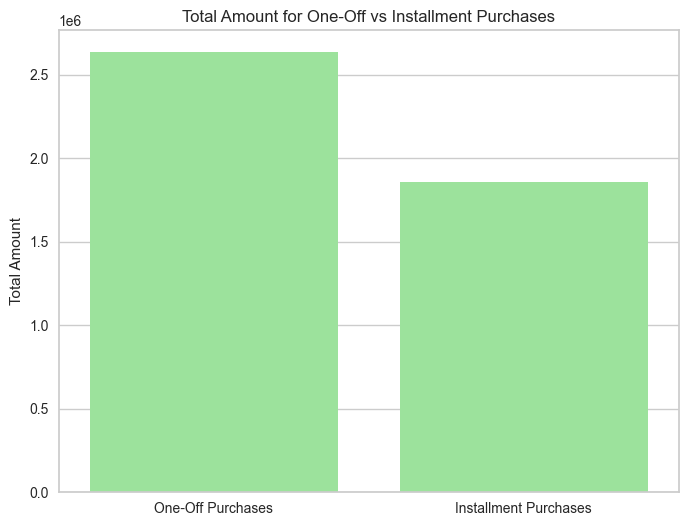

In [254]:
# Total untuk ONEOFF_PURCHASES vs INSTALLMENTS_PURCHASES
total_oneoff_purchases = df['ONEOFF_PURCHASES'].sum()
total_installment_purchases = df['INSTALLMENTS_PURCHASES'].sum()

# Plot the total
plt.figure(figsize=(8, 6))
sns.barplot(x=['One-Off Purchases', 'Installment Purchases'], y=[total_oneoff_purchases, total_installment_purchases], color='lightgreen')
plt.title('Total Amount for One-Off vs Installment Purchases')
plt.ylabel('Total Amount')

# Display hasil
plt.show()

Plot di atas menunjukkan jumlah total pembelian sekali jalan (One-Off Purchases) dibandingkan dengan jumlah total pembelian cicilan (Installment Purchases).
- One-Off Purchases: Jumlah total pembelian sekali jalan mencapai sekitar 2.6 juta. Ini menunjukkan bahwa ada jumlah pembelian yang signifikan dilakukan secara langsung dalam satu transaksi.
- Installment Purchases: Jumlah total pembelian cicilan mencapai sekitar 1.8 juta. Ini menunjukkan bahwa ada juga sejumlah besar pembelian yang dilakukan dengan metode cicilan, meskipun lebih rendah dibandingkan dengan pembelian sekali jalan.


##### **vii. Purchase Frequency**

Text(0.5, 1.0, 'FREKUENSI PEMBELIAN')

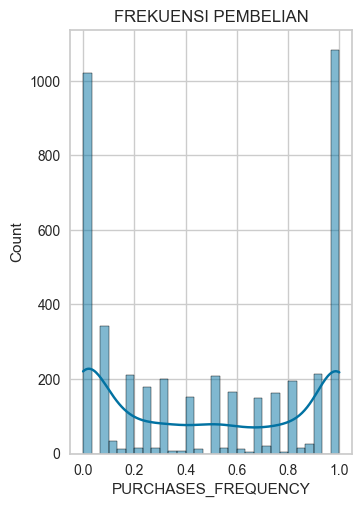

In [255]:
plt.subplot(1,2,1) # (baris,kolom,tempatnya)
sns.histplot(df.PURCHASES_FREQUENCY,kde=True,bins=30)
plt.title('FREKUENSI PEMBELIAN')

**Explanation:**

Di antara dua puncak utama diatas, distribusi frekuensi pembelian relatif lebih rendah dan merata, menunjukkan bahwa ada variasi yang lebih sedikit di antara pengguna dengan frekuensi pembelian menengah.

Risiko kredit mungkin lebih rendah untuk pengguna yang jarang belanja karena mereka cenderung memiliki saldo yang lebih rendah dan penggunaan yang lebih sporadis.

## **F. Feature Engineering**

Sebelum melanjutkan ke pengembangan model, penting untuk memilih fitur dengan hati-hati agar hanya mencakup fitur yang berkorelasi tinggi dan mengecualikan yang tidak relevan atau berlebihan. Selain itu, fitur-fitur yang dipilih harus diproses terlebih dahulu untuk meningkatkan analisis secara keseluruhan.

##### **a. Handling Missing Values**

In [256]:
# Check skewness terlbih dahulu
print(df['MINIMUM_PAYMENTS'].skew())
print(df['CREDIT_LIMIT'].skew())

12.357860274482807
1.5450779677462632


Ada beberapa metode untuk mengimputasi data:

- Mean = untuk kolom numerik yang berdistribusi normal.
- Median = untuk kolom numerik yang berdistribusi skew.
- Mode = untuk kolom kategorikal.

Kolom `MINIMUM_PAYMENTS` dan `CREDIT_LIMIT` memiliki skewness sebesar 12.35 dan 1.54, yang menunjukkan distribusi yang sangat skew. Akibatnya, kolom ini akan diimputasi menggunakan nilai median dari kolom tersebut.

Handling missing values dengan `SimpleImputer`

In [257]:
# Define imputer dengan strategi median
imputer = SimpleImputer(strategy='median')

# Menentukan kolom yang akan diimputasi
columns_to_impute = ['MINIMUM_PAYMENTS', 'CREDIT_LIMIT']

# Mengaplikasikan imputer pada kolom yang dipilih
df[columns_to_impute] = imputer.fit_transform(df[columns_to_impute])



Code ini menggunakan `SimpleImputer` untuk mengisi nilai-nilai yang hilang dengan median. Transformasi ini telah diterapkan pada kolom `MINIMUM_PAYMENTS` dan `CREDIT_LIMIT`. 

Untuk memastikan bahwa nilai-nilai yang hilang telah berhasil diimputasi, metode `isnull` diterapkan kembali untuk memverifikasi ketiadaan nilai-nilai yang hilang tersebut.

In [258]:
# Check the missing values after handling
df.isnull().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

Missing values unutk kolom `MINIMUM_PAYMENTS` dan `CREDIT_LIMIT` hasilnya 0 menunjukkan bahwa proses imputasi berhasil. 

##### **b. Handling Outlier**

In [259]:
# Cek unik values
df.nunique()

BALANCE                             4439
BALANCE_FREQUENCY                     42
PURCHASES                           3218
ONEOFF_PURCHASES                    2073
INSTALLMENTS_PURCHASES              2357
CASH_ADVANCE                        2155
PURCHASES_FREQUENCY                   47
ONEOFF_PURCHASES_FREQUENCY            44
PURCHASES_INSTALLMENTS_FREQUENCY      47
CASH_ADVANCE_FREQUENCY                46
CASH_ADVANCE_TRX                      55
PURCHASES_TRX                        147
CREDIT_LIMIT                         153
PAYMENTS                            4350
MINIMUM_PAYMENTS                    4317
PRC_FULL_PAYMENT                      47
TENURE                                 7
dtype: int64

Dalam penanganan outlier, hanya kolom **numeric** yang akan ditangani. Selain itu, kolom numerik dengan nilai unik **limited** (<10) tidak akan dilakukan handling outlier. Kolom yang dikecualikan adalah:

- `BALANCE_FREQUENCY`
- `PURCHASES_FREQUENCY`
- `ONEOFF_PURCHASES_FREQUENCY`
- `PURCHASES_INSTALLMENTS_FREQUENCY`
- `CASH_ADVANCE_FREQUENCY`
- `TENURE`

Untuk mengidentifikasi outlier, penting untuk memahami distribusi data terlebih dahulu, yang membantu menentukan metode yang tepat untuk mendeteksi dan menangani outlier. Hal ini dilakukan dengan metode `skewness`.

In [260]:
# Daftar kolom yang akan diperiksa outliers
columns_to_check = ['BALANCE', 'PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 
                    'CASH_ADVANCE', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 
                    'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT']


In [261]:
# Memeriksa skewness
def check_skewness(df, *column_names):
    return {col: df[col].skew() for col in column_names if col in df.columns}

# Hitung skewness untuk semua kolom numerikal sebelum transformasi
skewness_results = check_skewness(df, *columns_to_check)

# Print skewness
for col, skewness in skewness_results.items():
    print(f"{col}: {skewness}")

BALANCE: 2.456620962191608
PURCHASES: 8.987051591977552
ONEOFF_PURCHASES: 10.140058770209015
INSTALLMENTS_PURCHASES: 8.116887369354234
CASH_ADVANCE: 4.739677538274201
CASH_ADVANCE_TRX: 4.752780003316019
PURCHASES_TRX: 4.480452469147952
CREDIT_LIMIT: 1.545422651648898
PAYMENTS: 6.040773400922328
MINIMUM_PAYMENTS: 12.56971436375272
PRC_FULL_PAYMENT: 1.9116495684046537


Setelah dihitung nilai skewness tiap kolom, nilainya akan dikategorikan sebagai berikut: 
- **Normal columns**: Kolom dengan skewness between -0.5 and 0.5.
- **Skewed columns**: Kolom dengan skewness less than or equal to -1 or greater than or equal to 1.1.
- **Extremely skewed column**s: Kolom dengan skewness < to -1 or > to 1.

In [262]:
# Initialize empty lists for each skewness category
normal_columns = []
skewed_columns = []
extreme_skewed_columns = []

# Loop through the skewness values and categorize the columns
for col, skewness in skewness_results.items():
    if skewness < -1.0 or skewness > 1.0:
        extreme_skewed_columns.append(col)
    elif abs(skewness) <= 0.5:
        normal_columns.append(col)
    else:
        skewed_columns.append(col)

# Print the columns in each category
print(f"Normal: {normal_columns}\nSkewed: {skewed_columns}\nExtreme Skewed: {extreme_skewed_columns}")

Normal: []
Skewed: []
Extreme Skewed: ['BALANCE', 'PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT']


Dapat disimpulkan bahwa semua kolom **Extreme Skewed**.

In [263]:
# Create function to calculate outlier percentages
def calculate_outlier_percentages(df, columns, method='normal', distance=1.5):
    for variable in columns:
        if method == 'normal':
            std_dev = df[variable].std()
            mean_val = df[variable].mean()
            lower_boundary = mean_val - (3 * std_dev)
            upper_boundary = mean_val + (3 * std_dev)
        elif method == 'skew':
            IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25)
            lower_boundary = df[variable].quantile(0.25) - (IQR * distance)
            upper_boundary = df[variable].quantile(0.75) + (IQR * distance)

        outliers = df[(df[variable] < lower_boundary) | (df[variable] > upper_boundary)]
        outlier_percentage = len(outliers) / len(df) * 100
        
        print('Percentage of outliers in {}: {:.2f}%'.format(variable, outlier_percentage))

# For extreme skewed columns
calculate_outlier_percentages(df, extreme_skewed_columns, method='skew', distance=3)

Percentage of outliers in BALANCE: 2.28%
Percentage of outliers in PURCHASES: 4.07%
Percentage of outliers in ONEOFF_PURCHASES: 6.23%
Percentage of outliers in INSTALLMENTS_PURCHASES: 4.11%
Percentage of outliers in CASH_ADVANCE: 5.47%
Percentage of outliers in CASH_ADVANCE_TRX: 4.00%
Percentage of outliers in PURCHASES_TRX: 3.73%
Percentage of outliers in CREDIT_LIMIT: 0.31%
Percentage of outliers in PAYMENTS: 4.38%
Percentage of outliers in MINIMUM_PAYMENTS: 5.05%
Percentage of outliers in PRC_FULL_PAYMENT: 10.30%


Masih terdapat outlier di setiap kolom, dengan persentase sekitar 0.31% sampai 10.30%. Pelu dilakukan penanganan outlier. Penanganan outlier yang tepat akan membantu dalam mendapatkan hasil analisis yang lebih akurat dan andal.

In [264]:
## Handling outlier

# Fungsi menerapkan winsorization untuk handling outlier 
def apply_winsorization(df, variables, 
                        capping_method='iqr', 
                        tail='both', 
                        fold=3):
    winsoriser = Winsorizer(capping_method=capping_method, 
                            tail=tail, 
                            fold=fold, 
                            variables=variables)
    df_capped = winsoriser.fit_transform(df)
    return df_capped

# Menerapkan winsorization pada kolom skewed dan extremely skewed
df_capped = apply_winsorization(df, extreme_skewed_columns)

In [265]:
# For extreme skewed columns
calculate_outlier_percentages(df_capped, extreme_skewed_columns, method='skew', distance=3)

Percentage of outliers in BALANCE: 0.00%
Percentage of outliers in PURCHASES: 0.00%
Percentage of outliers in ONEOFF_PURCHASES: 0.00%
Percentage of outliers in INSTALLMENTS_PURCHASES: 0.00%
Percentage of outliers in CASH_ADVANCE: 0.00%
Percentage of outliers in CASH_ADVANCE_TRX: 0.00%
Percentage of outliers in PURCHASES_TRX: 0.00%
Percentage of outliers in CREDIT_LIMIT: 0.00%
Percentage of outliers in PAYMENTS: 0.00%
Percentage of outliers in MINIMUM_PAYMENTS: 0.00%
Percentage of outliers in PRC_FULL_PAYMENT: 0.00%


Penerapan metode winsorization menggunakan metode capping dengan IQR dan fold=3 pada kolom yang memiliki distribusi extremely skewed berhasil mengeliminasi semua outlier. Ini terlihat dari persentase outlier yang menjadi 0% pada semua kolom yang dianalisis. Metode winsorization terbukti efektif dalam menangani outlier pada dataset ini. 
. 

**Visualisasi untuk Memeriksa Hasil Handling Outliers**

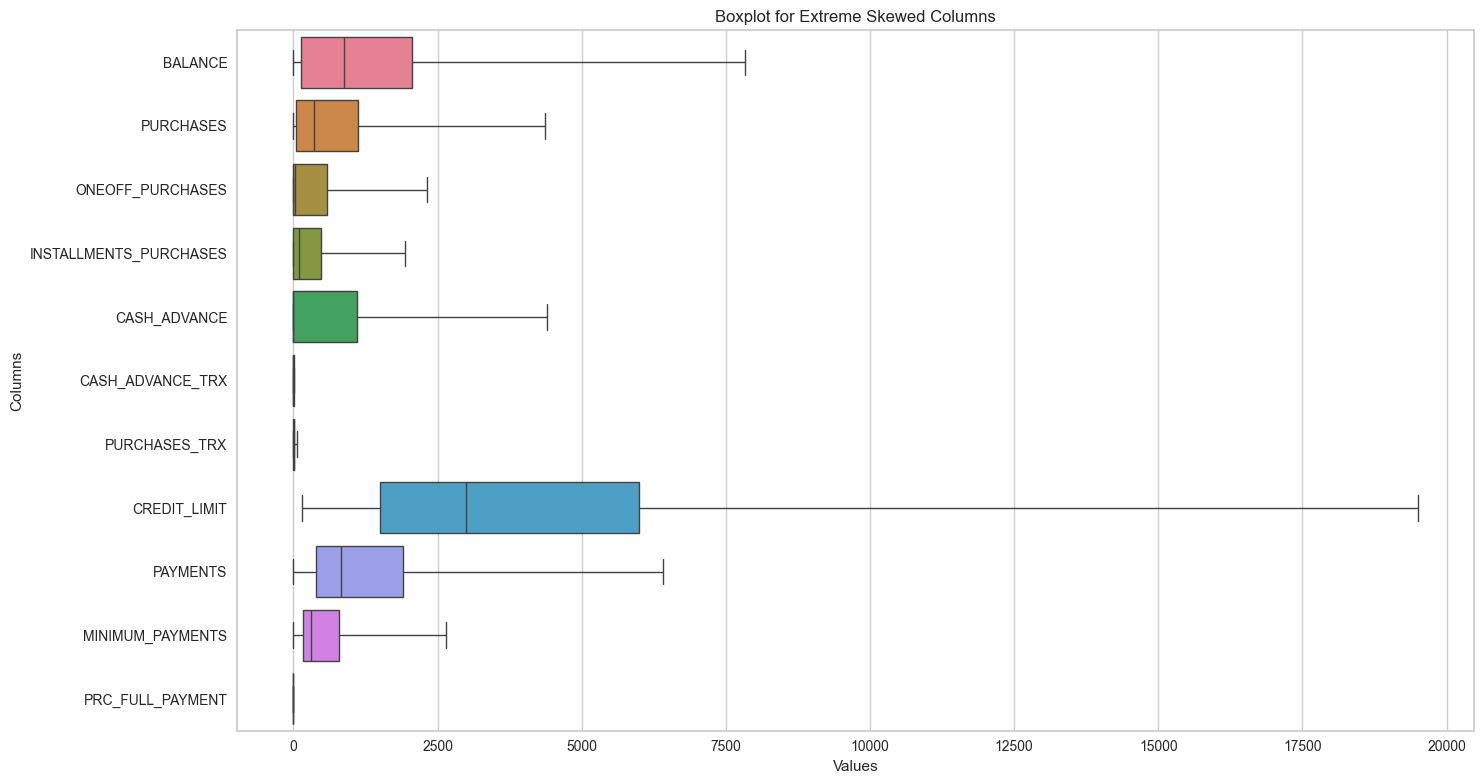

In [266]:
# Create a figure and 1 subplot
fig, ax = plt.subplots(figsize=(15, 8))

# Boxplot for extreme skewed columns
sns.boxplot(data=df_capped[extreme_skewed_columns], orient="h", whis=3, ax=ax)
ax.set_title("Boxplot for Extreme Skewed Columns")
ax.set_xlabel("Values")
ax.set_ylabel("Columns")

# Display the plot
plt.tight_layout()
plt.show()

Insight:
- Pada boxplot hasil winsorization, tidak ada lagi outlier yang terlihat di luar garis batas atas dan bawah untuk setiap kolom. Ini menunjukkan bahwa semua nilai ekstrem telah berhasil dihandle dan dipindahkan ke batas yang telah ditentukan.
- Setelah penerapan winsorization, distribusi nilai pada kolom yang ditangani menjadi lebih homogen, yang akan mempermudah dalam analisis lanjutan dan model machine learning.

##### **c. Feature Selection**

Setelah handling missing value dan outlier, selanjutnya akan dilakukan feature selection untuk mengoptimallkan performa model. 

**i. Split Kolom Numeric and Categorical**

Pertama dengan memisahkan kolom numerik dan kategorik, seperti yang telah disebutkan sebelumnya pada Data Loading. 

In [267]:
# Define numerical columns
num_cols = ['BALANCE', 'PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 
            'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 
            'PRC_FULL_PAYMENT', 'TENURE']

# Define categorical columns
cat_cols_encoded = ['BALANCE_FREQUENCY', 'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY', 
                     'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY']

# Apply columns to the dataframe
df_num = df_capped[num_cols]
df_cat = df_capped[cat_cols_encoded]

# Show result
print('Numerical columns : ', num_cols)
print('Categorical encoded columns : ', cat_cols_encoded)

Numerical columns :  ['BALANCE', 'PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE']
Categorical encoded columns :  ['BALANCE_FREQUENCY', 'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY']


Kolom yang displit disimpan dalam variabel dan diterapkan ke dataframe. `df_num` berisi kolom numerik, sedangkan `df_cat` berisi kolom kategorikal.

**ii. Scaling**

KOlom numerik perlu di scaling terlebih dahulu untuk makesure semua angka dalam skala yang sama. 

Scaler yang dipilih untuk tujuan ini adalah `MinMaxScaler` karena semua kolom menunjukkan kemiringan yang ekstrim. Scaler ini kemudian diterapkan ke kerangka data numerik untuk menormalkan data dalam rentang yang konsisten.

In [268]:
# Feature scaling
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df_num)

In [269]:
# Display DataFrame (optional si)
pd.DataFrame(scaler.fit_transform(df_num), columns=num_cols)

BALANCE  PURCHASES  ONEOFF_PURCHASES  INSTALLMENTS_PURCHASES  \
0     0.002116   0.045763          0.000000                0.103251   
1     0.120409   0.023568          0.044372                0.000000   
2     0.000253   0.018305          0.034464                0.000000   
3     0.058886   0.133856          0.252016                0.000000   
4     0.134448   0.331780          0.624655                0.000000   
...        ...        ...               ...                     ...   
4470  0.137691   0.000000          0.000000                0.000000   
4471  0.103310   0.000000          0.000000                0.000000   
4472  0.432145   0.128360          0.184045                0.069055   
4473  0.617695   0.365171          0.687522                0.000000   
4474  0.252283   0.236145          0.097748                0.415659   

      CASH_ADVANCE  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  PAYMENTS  \
0         0.000000            0.0000       0.030769      0.054264  0.000000   
1         0.000000            0.0000       0.015385      0.043928  0.033575   
2         0.000000            0.0000       0.015385      0.069767  0.000000   
3         0.000000            0.0000       0.015385      0.043928  0.040235   
4         0.000000            0.0000       0.015385      0.069767  0.061918   
...            ...               ...            ...           ...       ...   
4470      0.286639            0.5625       0.000000      0.054264  0.215124   
4471      0.869237            0.4375       0.000000      0.206718  0.681740   
4472      0.456993            0.5625       0.307692      0.514212  0.162009   
4473      0.992046            1.0000       0.384615      0.302326  0.141247   
4474      0.986719            1.0000       0.261538      0.198966  0.476582   

      MINIMUM_PAYMENTS  PRC_FULL_PAYMENT    TENURE  
0             0.116805          0.000000  0.333333  
1             0.154744          0.000000  0.333333  
2             0.116805          0.000000  0.333333  
3             0.057177          0.000000  0.333333  
4             0.085622          0.000000  0.333333  
...                ...               ...       ...  
4470          0.102294          0.136363  0.833333  
4471          0.091089          0.136363  0.833333  
4472          0.334038          0.000000  0.833333  
4473          0.896116          0.136363  0.833333  
4474          0.343335          0.136363  0.833333  

[4475 rows x 12 columns]

- Proses scaling menggunakan MinMaxScaler berhasil menormalkan semua kolom numerik dalam dataset ke dalam rentang yang konsisten (0 hingga 1).
- Data yang telah di scaling ditampilkan dalam bentuk DataFrame untuk memudahkan visualisasi dan verifikasi hasil scaling. Dapat dilihat melihat bahwa semua nilai dalam kolom numerik telah berada dalam rentang 0 hingga 1.


##### **d. Dimensionality Reduction**


In [270]:
# Dimensionality reduction using PCA
pca = PCA()
pca.fit(df_scaled)

PCA()

Berhasil define PCA. 

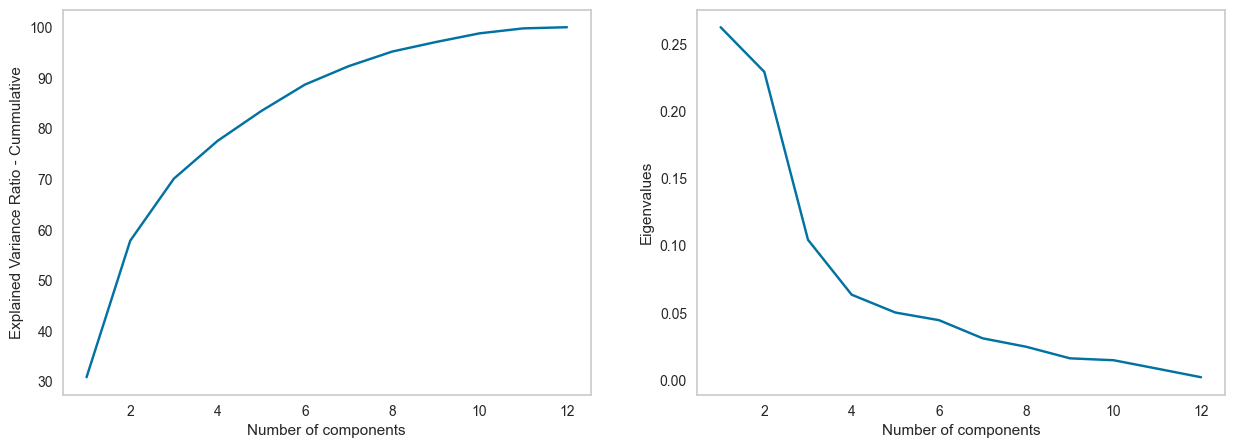

In [271]:
# Plot of the explained variance ratio
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.plot(range(1, 13), np.cumsum(pca.explained_variance_ratio_ * 100))
plt.xlabel('Number of components')
plt.ylabel('Explained Variance Ratio - Cummulative')
plt.grid()


# Plot Eigenvalues
plt.subplot(1, 2, 2)
plt.plot(range(1, 13), pca.explained_variance_ )
plt.xlabel('Number of components')
plt.ylabel('Eigenvalues')
plt.grid()


**Explanation:**
- **Kumulatif Explained Variance Ratio**: Plot ini menunjukkan jumlah variansi yang dijelaskan oleh setiap komponen utama secara kumulatif. Grafik ini membantu dalam menentukan berapa banyak komponen yang diperlukan untuk mempertahankan sebagian besar variabilitas data tanpa harus menggunakan semua komponen.

    Dari plot diatas, dapat dilihat bahwa sekitar 90% dari total variansi data dapat dijelaskan oleh sekitar 6-8 komponen utama. Hal ini menunjukkan bahwa kita dapat mengurangi dimensi data dari 17 fitur asli menjadi 6-8 komponen utama tanpa kehilangan banyak informasi.

- **Plot Eigenvalues**: Plot ini menunjukkan bahwa komponen utama pertama memiliki eigenvalue tertinggi, yang berarti komponen ini menjelaskan sebagian besar variansi dalam data. Eigenvalue menurun dengan bertambahnya jumlah komponen, menunjukkan bahwa setiap komponen tambahan menjelaskan lebih sedikit variansi.

Kesimpulannya, dengan menggunakan PCA, kita dapat mereduksi dimensi data dari 17 fitur menjadi 6-8 komponen utama sambil mempertahankan sekitar 90% dari total variansi dalam data. Hal ini dapat membantu dalam meningkatkan efisiensi model machine learning dan mengurangi overfitting. 


In [272]:
# Check the number of features if we want to retain 90% of the information

cumsum = np.cumsum(pca.explained_variance_ratio_)
num_features = np.argmax(cumsum >= 0.90) + 1
num_features

7

In [273]:
# Let's train the model with reducing to 7 component

pca = PCA(n_components=7)
pca.fit(df_scaled)

df_scaled_pca = pca.transform(df_scaled)

Meskipun mempertahankan **90%** varians dalam original dataset, jumlah komponen yang ditemukan PCA adalah **7 komponen**. Outputnya menunjukkan bahwa dengan menggunakan PCA, dimensi dataset telah dikurangi menjadi 7 komponen utama.

Pengurangan dimensi ini membantu menyederhanakan dataset sambil mempertahankan sebagian besar informasi penting, yang dapat meningkatkan kinerja dan efisiensi model machine learning selanjutnya.

##### **Concatenate Columns**

In [274]:
# Concatenate columns
df_concat = np.concatenate([df_scaled_pca, df_cat], axis=1)
df_concat = pd.DataFrame(df_concat, columns=[['PCA1', 'PCA2', 'PCA3', 'PCA4', 'PCA5', 'PCA6', 'PCA7'] 
                                             + cat_cols_encoded])
df_concat = df_concat.infer_objects()

df_concat

PCA1      PCA2      PCA3      PCA4      PCA5      PCA6      PCA7  \
0    -0.402403 -0.369201 -0.178671  0.223596  0.392216  0.318011  0.148318   
1    -0.429397 -0.294407 -0.187095  0.246010  0.293810  0.393884  0.140204   
2    -0.445522 -0.366906 -0.175058  0.279441  0.313898  0.346929  0.141336   
3    -0.283082 -0.330759 -0.206629  0.434561  0.250575  0.355038  0.118204   
4    -0.004644 -0.226195 -0.285094  0.642000  0.126140  0.435778  0.041192   
...        ...       ...       ...       ...       ...       ...       ...   
4470 -0.461755  0.083380  0.203361  0.164440  0.098144 -0.152712 -0.091474   
4471 -0.376877  0.454468  0.506447  0.248762  0.046640 -0.280786  0.378110   
4472 -0.150980  0.539809  0.032031  0.106124  0.068300  0.032131 -0.143471   
4473  0.081219  1.275076  0.251772  0.312111 -0.001891  0.199592 -0.664685   
4474 -0.084280  0.896041  0.537486  0.141129  0.444763 -0.375643 -0.142499   

     BALANCE_FREQUENCY PURCHASES_FREQUENCY ONEOFF_PURCHASES_FREQUENCY  \
0             0.125000            0.125000                   0.000000   
1             0.875000            0.125000                   0.125000   
2             0.125000            0.125000                   0.125000   
3             1.000000            0.125000                   0.125000   
4             1.000000            0.125000                   0.125000   
...                ...                 ...                        ...   
4470          1.000000            0.000000                   0.000000   
4471          0.909091            0.000000                   0.000000   
4472          1.000000            1.000000                   0.727273   
4473          1.000000            0.454545                   0.454545   
4474          1.000000            0.909091                   0.090909   

     PURCHASES_INSTALLMENTS_FREQUENCY CASH_ADVANCE_FREQUENCY  
0                            0.125000               0.000000  
1                            0.000000               0.000000  
2                            0.000000               0.000000  
3                            0.000000               0.000000  
4                            0.000000               0.000000  
...                               ...                    ...  
4470                         0.000000               0.545455  
4471                         0.000000               0.545455  
4472                         0.363636               0.545455  
4473                         0.000000               0.545455  
4474                         0.818182               0.545455  

[4475 rows x 12 columns]

In [275]:
# Get the position of categorical columns
index_cat_cols_columns = [np.where(array)[0][0] for array in [df_concat.columns.get_loc(col) 
                                                         for col in cat_cols_encoded]]

print('Encoded Categorical columns        : ', cat_cols_encoded)
print('Encoded Categorical columns index  : ', index_cat_cols_columns)

Encoded Categorical columns        :  ['BALANCE_FREQUENCY', 'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY']
Encoded Categorical columns index  :  [7, 8, 9, 10, 11]


Penggabungan kolom PCA dengan kolom kategorikal yang telah dienkode menghasilkan DataFrame yang siap digunakan untuk analisis lebih lanjut. Kolom-kolom PCA mengandung informasi utama dari data numerik yang telah direduksi dimensinya, sementara kolom kategorikal tetap mempertahankan informasi aslinya namun dalam bentuk numerik yang bisa digunakan oleh algoritma machine learning

### **Find the Optimal Number of Clusters**

#### **K-Means Clusters**

##### **1. Elbow Method**

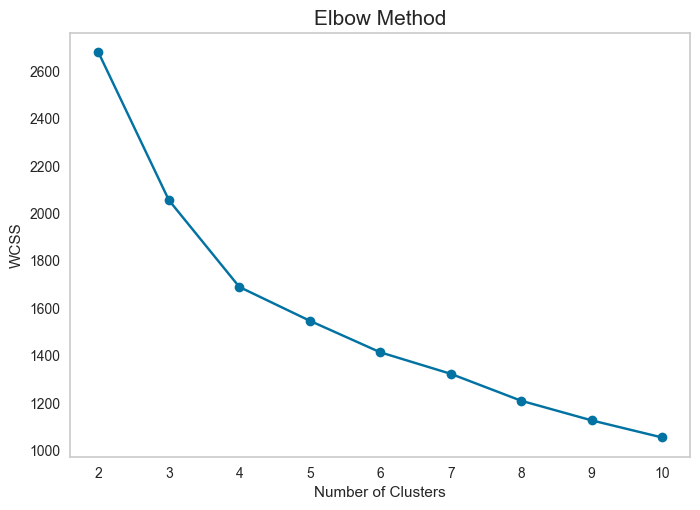

In [276]:
# Define empty list to store wcss values
wcss = []


# Membuat iterasi dari 2-10 untuk nilai k terbaik
for i in range(2, 11):
    # Define KMeans model
    km = KMeans(n_clusters = i,
                init = 'k-means++',
                max_iter = 300,
                n_init = 10,
                random_state = 15)
    km.fit(df_scaled_pca)
    wcss.append(km.inertia_)

# Plot the graph
plt.plot(range(2, 11), wcss, marker ="o")
plt.title('Elbow Method', fontsize = 15)
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.grid()
plt.show()


- **Metode Elbow**: Grafik Elbow Method digunakan untuk menentukan jumlah cluster yang optimal. Sumbu x menunjukkan jumlah cluster (`k`), dan sumbu y menunjukkan nilai WCSS.
- **WCSS**: WCSS mengukur total varian dalam setiap cluster. Grafik diatas menunjukkan penurunan WCSS yang tajam hingga k=4, kemudian penurunan menjadi lebih lambat setelahnya.

Dari grafik Elbow Method, terlihat bahwa titik siku (elbow) yang signifikan terjadi pada k=4. Ini menunjukkan bahwa menggunakan 4 cluster adalah pilihan yang baik untuk model K-Means.

##### **2. Silhouette Method**

In [277]:
# Function to make a Silhouette Plot

def plot_silhouette(range_n_clusters, X, random_state):

    # Looping for each n_cluster in range_n_cluster
    for n_clusters in range_n_clusters:
        # Create subplots with 1 row and 2 columns
        fig, (ax1, ax2) = plt.subplots(1, 2)
        fig.set_size_inches(18, 4)

        # The first subplot is Silhouette plot
        # Set of silhouette coefficients
        ax1.set_xlim([-0.1, 1])
        # The (n_clusters+1)*10 is for inserting blank space between silhouette plots of individual clusters, to demarcate them clearly
        ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

        # Cluster initialization with n_clusters value and random seed generator of 10 for reproducibility
        clusterer = KMeans(n_clusters = n_clusters, 
                           init = 'k-means++', 
                           max_iter = 300, 
                           n_init = 10, 
                           random_state = 15)
        cluster_labels = clusterer.fit_predict(X)

        # Silhouette_score gives the average value for all samples
        # Display the density and separation of clusters formed
        silhouette_avg = silhouette_score(X, cluster_labels)
        print("For n_clusters =", n_clusters,
              "The average silhouette_score is :", silhouette_avg)

        # Calculate the silhouette score for each sample
        sample_silhouette_values = silhouette_samples(X, cluster_labels)

        y_lower = 10
        for i in range(n_clusters):
            # Combine silhouette scores for samples belonging to cluster i, and sort
            ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
            ith_cluster_silhouette_values.sort()

            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_clusters)
            ax1.fill_betweenx(np.arange(y_lower, y_upper),
                              0, ith_cluster_silhouette_values,
                              facecolor=color, edgecolor=color, alpha=0.7)

            # Labeling the silhouette plot with its cluster number in the center
            ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

            # Calculate a new y_lower for the next plot, 10 for 0 samples
            y_lower = y_upper + 10 

        ax1.set_title("The silhouette plot for the various clusters.")
        ax1.set_xlabel("The silhouette coefficient values")
        ax1.set_ylabel("Cluster label")

        # Vertical line for average silhouette score of all values
        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

        ax1.set_yticks([])  # Clear the yaxis labels / ticks
        ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

        # Second Plot, showing the actual cluster
        colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
        ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                    c=colors, edgecolor='k')

        # Labeling cluster
        centers = clusterer.cluster_centers_

        # Create white circles on cluster centers
        ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                    c="white", alpha=1, s=200, edgecolor='k')

        for i, c in enumerate(centers):
            ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50, edgecolor='k')

        ax2.set_title("The visualization of the clustered data.")
        ax2.set_xlabel("Feature space for the 1st feature")
        ax2.set_ylabel("Feature space for the 2nd feature")

        plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                      "with n_clusters = %d" % n_clusters),
                     fontsize=14, fontweight='bold')

For n_clusters = 2 The average silhouette_score is : 0.36281938840560496
For n_clusters = 3 The average silhouette_score is : 0.33955587045609453
For n_clusters = 4 The average silhouette_score is : 0.3344431985546064
For n_clusters = 5 The average silhouette_score is : 0.299945486481559
For n_clusters = 6 The average silhouette_score is : 0.31510753896422455
For n_clusters = 7 The average silhouette_score is : 0.28414360870115885
For n_clusters = 8 The average silhouette_score is : 0.30412830996465173
For n_clusters = 9 The average silhouette_score is : 0.30980284271276015


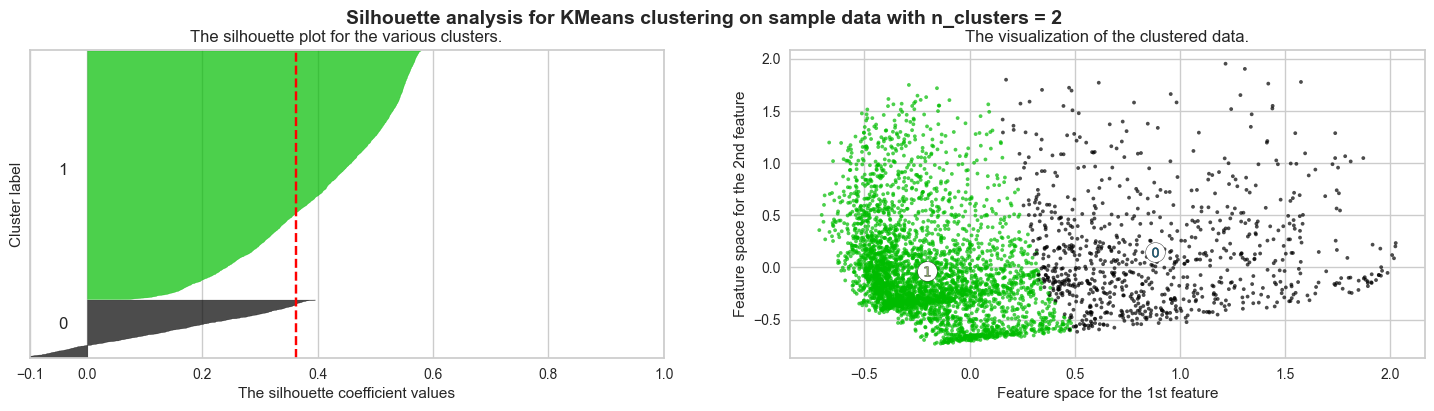

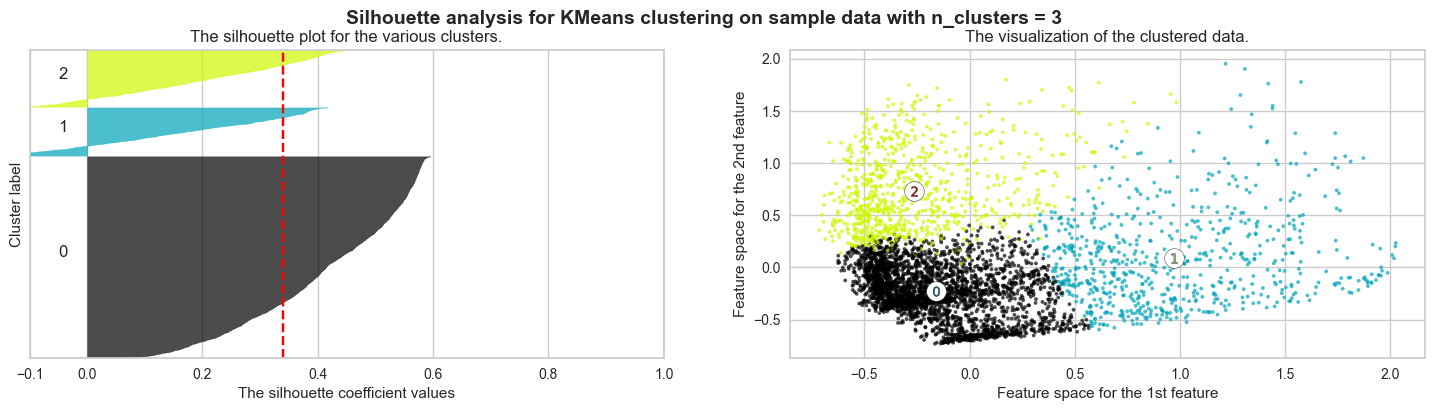

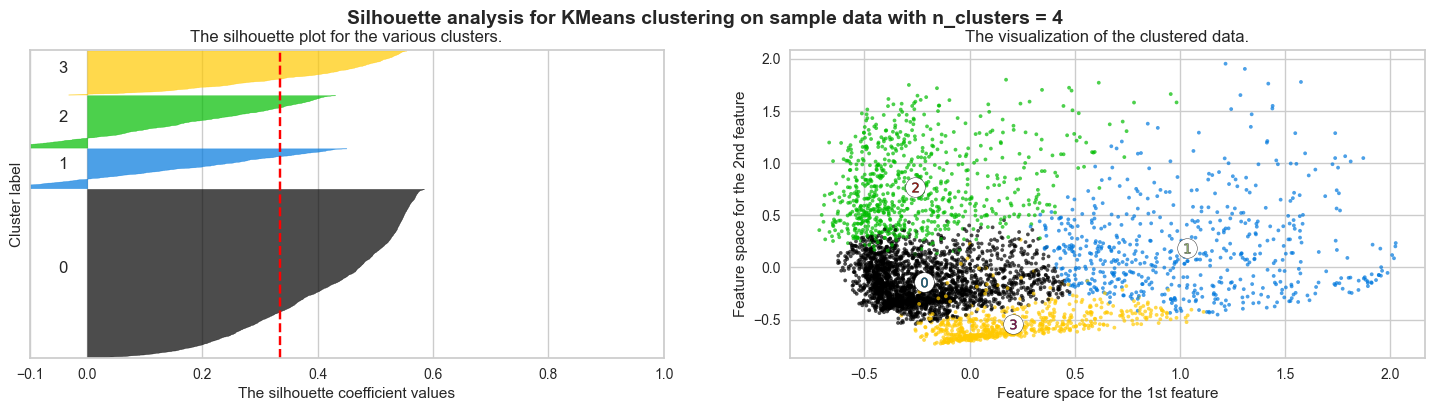

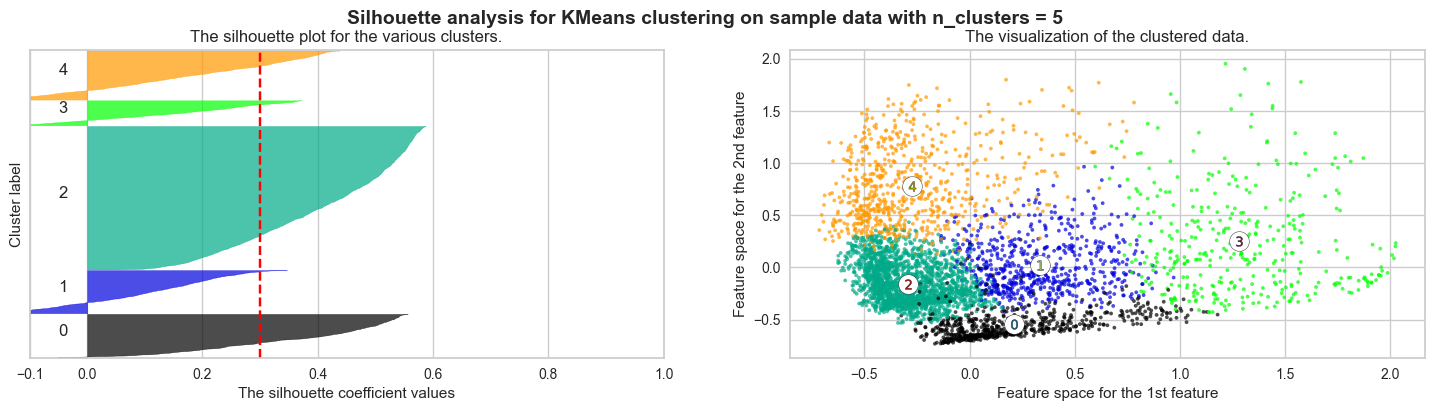

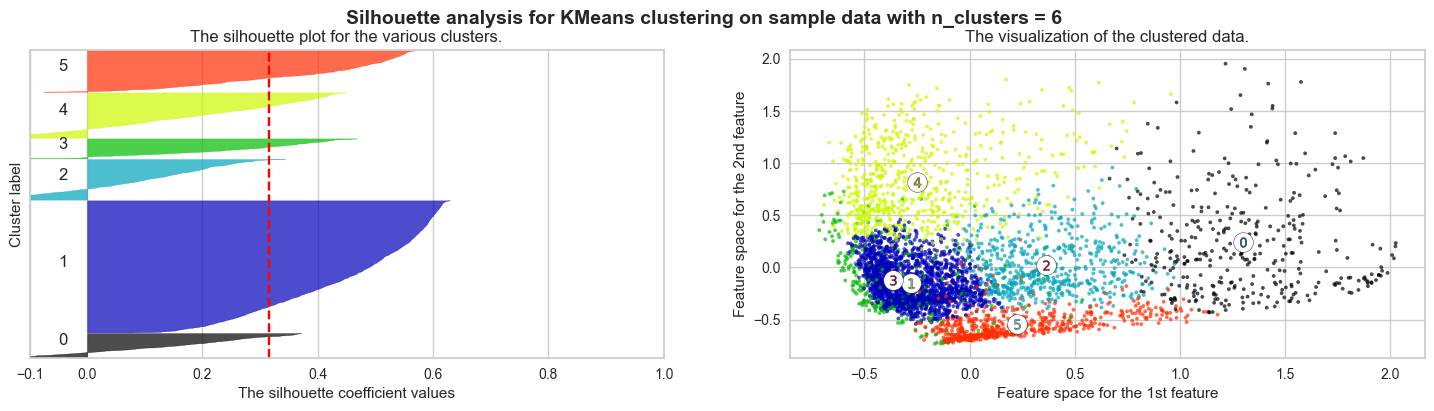

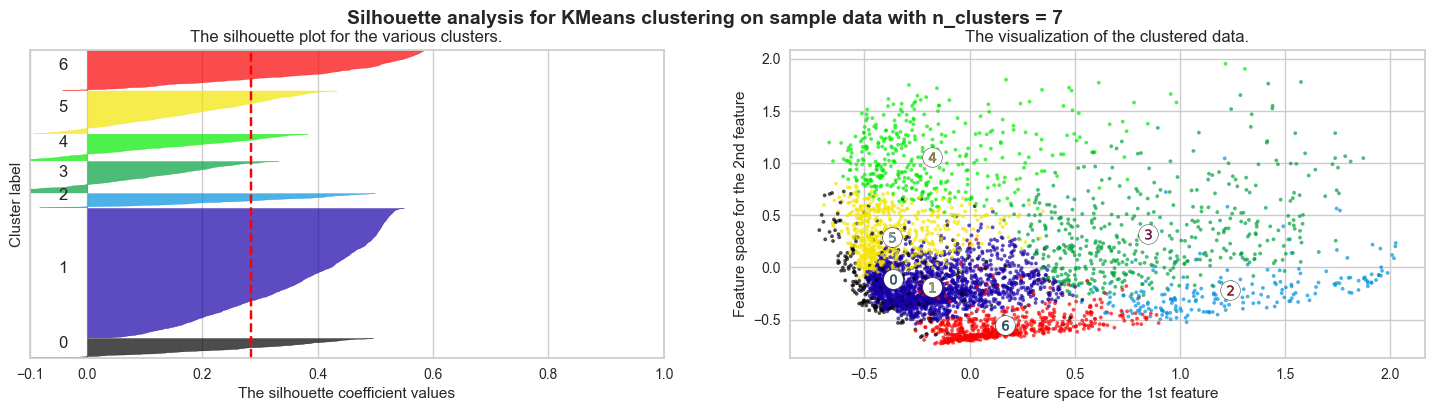

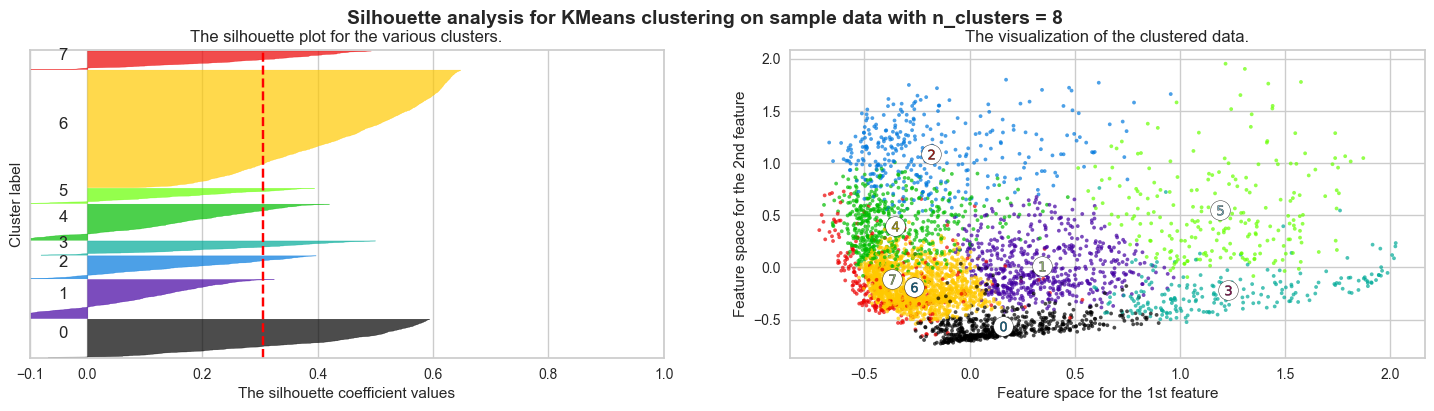

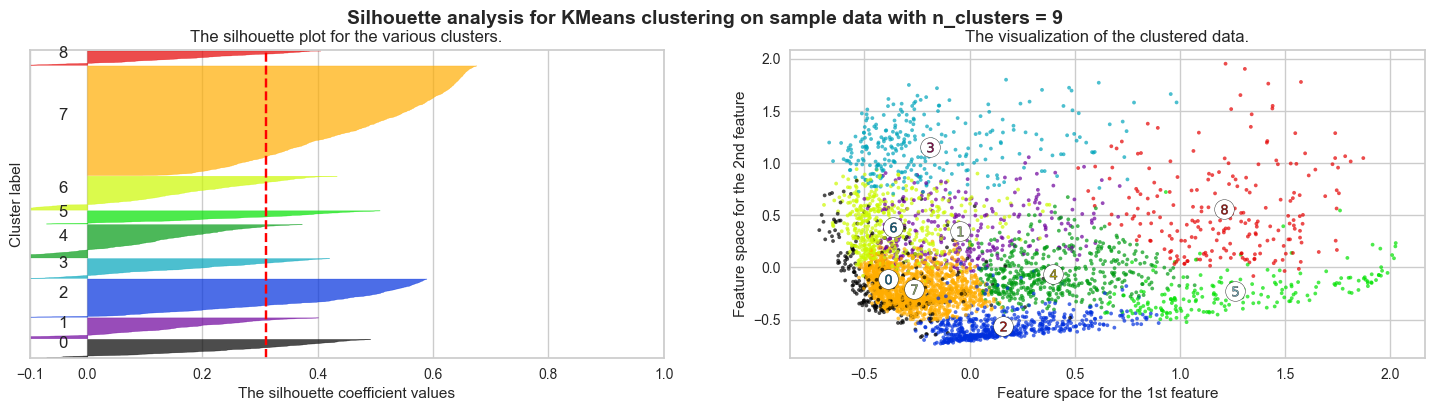

In [278]:
# Display Silhouette Score and Silhouette Plot
plot_silhouette(range(2, 10), df_scaled_pca, 15)

- **Position Relative to the Red Line**: Garis putus-putus merah dalam plot silhouette menunjukkan skor rata-rata silhouette untuk klaster. Setiap silhouette individu (mewakili titik data) sebaiknya berada di atas garis merah ini untuk menunjukkan klasterisasi yang baik.

Walaupun cluster 2 memiliki skor rata-rata tertinggi, analisis akan fokus pada interpretasi klaster 4.

Berdasarkan dua metode yang digunakan, dapat disimpulkan bahwa jumlah klaster yang optimal untuk **K-Means** adalah **4**. Kesimpulan ini diambil dari analisis skor silhouette dan Metode Elbow, yang keduanya mendukung pilihan empat cluster sebagai konfigurasi yang paling efektif untuk dataset ini.

## **G. Model Definition**



Bagian ini menjelaskan model yang digunakan dalam analisis, khususnya **K-Means**. Pemilihan model didasarkan pada karakteristik kumpulan data; K-Means dipilih karena lebih cocok untuk mengelompokkan data secara akurat dibandingkan dengan DBSCAN.

In [279]:
# Define model

# Train the optimal number of clusters
km = KMeans(n_clusters = 4, random_state = 15)
km

KMeans(n_clusters=4, random_state=15)

## **H. Model Clustering**

In [280]:
# Predict clusters
pred_km = km.fit_predict(df_scaled_pca)
pred_km

array([1, 1, 1, ..., 0, 0, 0])

In [281]:
# Menampilkan jumlah iterasi untuk konvergensi
# Iterasi keberapa dia konvergen

km.n_iter_

12

In [282]:
# Add clustering result to new columns

df_kmeans = df.copy()               #ini untuk coba2 model lain
df_kmeans['Cluster_KMeans'] = pred_km

df_kmeans

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0       16.581535           0.125000     200.00              0.00   
1      943.584041           0.875000     103.00            103.00   
2        1.979916           0.125000      80.00             80.00   
3      461.455720           1.000000     585.00            585.00   
4     1053.594730           1.000000    1450.00           1450.00   
...           ...                ...        ...               ...   
4470  1079.008102           1.000000       0.00              0.00   
4471   809.582978           0.909091       0.00              0.00   
4472  3386.490883           1.000000     560.98            427.22   
4473  4840.545574           1.000000    1595.93           1595.93   
4474  1977.007090           1.000000    1032.04            226.90   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                     200.00      0.000000             0.125000   
1                       0.00      0.000000             0.125000   
2                       0.00      0.000000             0.125000   
3                       0.00      0.000000             0.125000   
4                       0.00      0.000000             0.125000   
...                      ...           ...                  ...   
4470                    0.00   1259.571764             0.000000   
4471                    0.00   3819.672466             0.000000   
4472                  133.76   2008.153534             1.000000   
4473                    0.00   4359.325750             0.454545   
4474                  805.14   4335.919227             0.909091   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                       0.000000                          0.125000   
1                       0.125000                          0.000000   
2                       0.125000                          0.000000   
3                       0.125000                          0.000000   
4                       0.125000                          0.000000   
...                          ...                               ...   
4470                    0.000000                          0.000000   
4471                    0.000000                          0.000000   
4472                    0.727273                          0.363636   
4473                    0.454545                          0.000000   
4474                    0.090909                          0.818182   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                   0.000000                 0              2        1200.0   
1                   0.000000                 0              1        1000.0   
2                   0.000000                 0              1        1500.0   
3                   0.000000                 0              1        1000.0   
4                   0.000000                 0              1        1500.0   
...                      ...               ...            ...           ...   
4470                0.545455                 9              0        1200.0   
4471                0.545455                 7              0        4150.0   
4472                0.545455                 9             20       10100.0   
4473                0.545455                17             25        6000.0   
4474                0.545455                21             17        4000.0   

         PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  Cluster_KMeans  
0        0.000000        309.854995          0.000000       8               1  
1      215.325023        410.484825          0.000000       8               1  
2        0.000000        309.854995          0.000000       8               1  
3      258.032630        151.696433          0.000000       8               1  
4      397.090516        227.143184          0.000000       8               1  
...           ...               ...               ...     ...             ...  
4470  1379.635287        2

Model K-Means berhasil mempartisi data ke dalam beberapa cluster dengan menggunakan 4 komponen utama hasil transformasi PCA. Hasil clustering menunjukkan bagaimana data tersegmentasi ke dalam kelompok-kelompok yang berbeda berdasarkan pola-pola dalam data.

## **I. Model Visualization**

In [283]:
# Define the data
df_kmeans.head()

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0    16.581535              0.125      200.0               0.0   
1   943.584041              0.875      103.0             103.0   
2     1.979916              0.125       80.0              80.0   
3   461.455720              1.000      585.0             585.0   
4  1053.594730              1.000     1450.0            1450.0   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                   200.0           0.0                0.125   
1                     0.0           0.0                0.125   
2                     0.0           0.0                0.125   
3                     0.0           0.0                0.125   
4                     0.0           0.0                0.125   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                       0.000                             0.125   
1                       0.125                             0.000   
2                       0.125                             0.000   
3                       0.125                             0.000   
4                       0.125                             0.000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                     0.0                 0              2        1200.0   
1                     0.0                 0              1        1000.0   
2                     0.0                 0              1        1500.0   
3                     0.0                 0              1        1000.0   
4                     0.0                 0              1        1500.0   

     PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  Cluster_KMeans  
0    0.000000        309.854995               0.0       8               1  
1  215.325023        410.484825               0.0       8               1  
2    0.000000        309.854995               0.0       8               1  
3  258.032630        151.696433               0.0       8               1  
4  397.090516        227.143184               0.0       8               1

In [284]:
# Menampilkan distribusi nilai dalam kolom Cluster_KMeans
cluster_counts = df_kmeans['Cluster_KMeans'].value_counts()
print(cluster_counts)

Cluster_KMeans
1    2469
0     771
2     649
3     586
Name: count, dtype: int64


Hasil clustring menunjukkan bahwa data terdistribusi ke dalam empat cluster dengan distribusi sebagai berikut:

- **Klaster 0**: 771 data poin
- **Klaster 1**: 2469 data poin
- **Klaster 2**: 649 data poin
- **Klaster 3**: 586 data poin

#### **a. Visualisasi Hasil Cluster**


<Axes: >

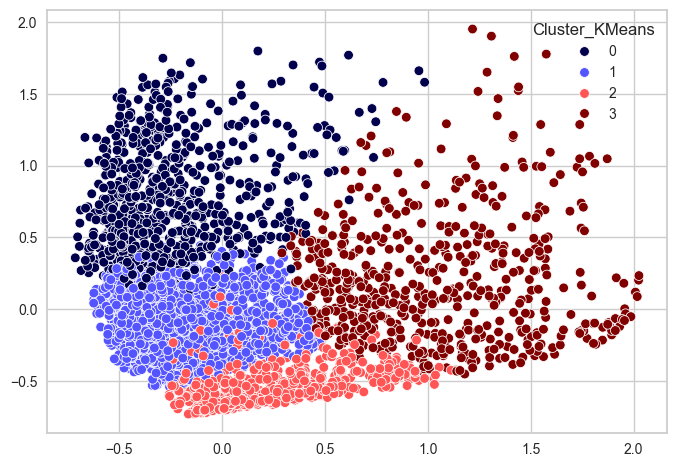

In [285]:
# Cluster visualization in 2D

pca_2d = PCA(n_components=2)
pca_2d.fit(df_scaled)

X_scaled_pca_2d = pca_2d.fit_transform(df_scaled)

#scatter PC1 & PC2
sns.scatterplot(x=X_scaled_pca_2d[:,0], y=X_scaled_pca_2d[:,1], hue=df_kmeans['Cluster_KMeans'], palette='seismic')

**Visualisasi Cluster K-Means**. Grafik di atas menunjukkan hasil klasterisasi dengan menggunakan PCA. Visualisasi menunjukkan bahwa data telah terbagi ke dalam empat cluster yang berbeda. Setiap cluster terlihat cukup terpisah, meskipun ada beberapa tumpang tindih antara cluster-cluster tertentu.

## **J. EDA after Clustering** 


In [286]:
# Memeriksa data duplikat after Clustering
df_kmeans.duplicated().any()

False

In [287]:
# Menghitung jumlah data duplikat after Clustering
df_kmeans.duplicated().sum()

0

Tidak ada data duplikat setelah melakukan clustering. 

#### **a. Cluster Distribution**

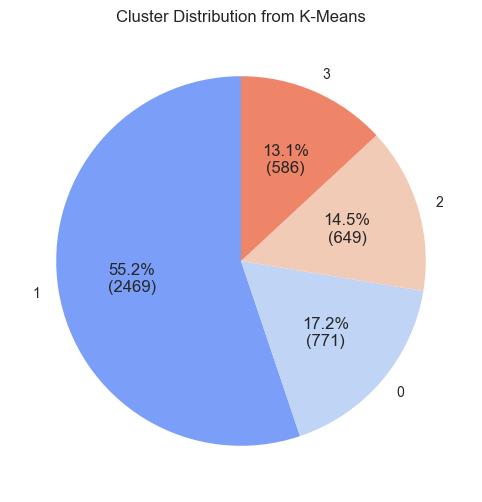

In [288]:
# Count the occurences of each clusters
cluster_counts = df_kmeans['Cluster_KMeans'].value_counts()

# Custom autopct function to show both percentage and value
def autopct_format(values):
    def my_format(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return f'{pct:.1f}%\n({val})'
    return my_format

# Plot the pie chart
plt.figure(figsize=(8, 6))
plt.pie(cluster_counts, labels=cluster_counts.index, autopct=autopct_format(cluster_counts),
        startangle=90, colors=sns.color_palette('coolwarm', n_colors=len(cluster_counts)))
plt.title('Cluster Distribution from K-Means')
plt.show()



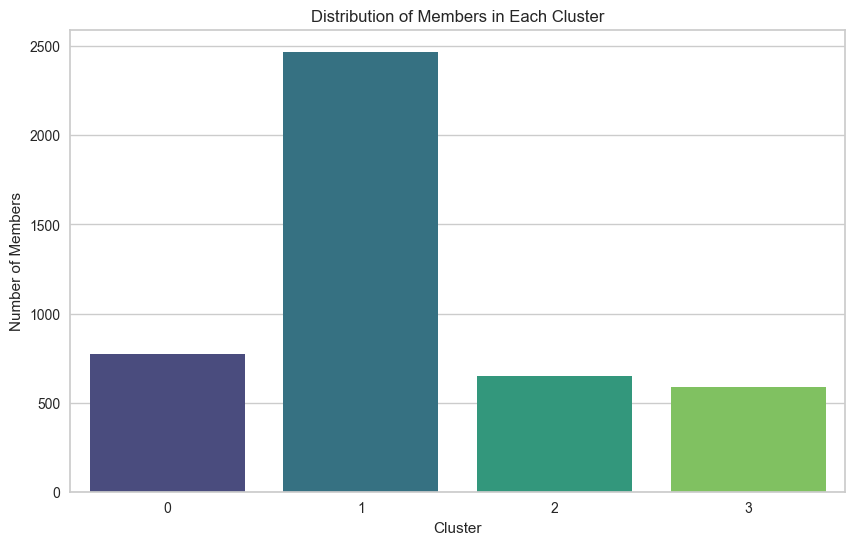

In [289]:
# Distribusi jumlah anggota di setiap cluster
cluster_counts = df_kmeans['Cluster_KMeans'].value_counts()
plt.figure(figsize=(10, 6))
sns.barplot(x=cluster_counts.index, y=cluster_counts.values, palette='viridis')
plt.title('Distribution of Members in Each Cluster')
plt.xlabel('Cluster')
plt.ylabel('Number of Members')
plt.show()


- Mayoritas data (55.2%) berada dalam Cluster 1, menunjukkan bahwa karakteristik yang membentuk cluster ini adalah yang paling umum di antara data poin.
- cluster 0 dan cluster 2 memiliki distribusi yang relatif mirip, masing-masing mewakili sekitar 17.2% dan 14.5% dari total data.
- cluster 3 adalah klaster terkecil dengan hanya 13.1% dari total data.


#### **b. Perbandingan antara Saldo dengan Batas Kredit**

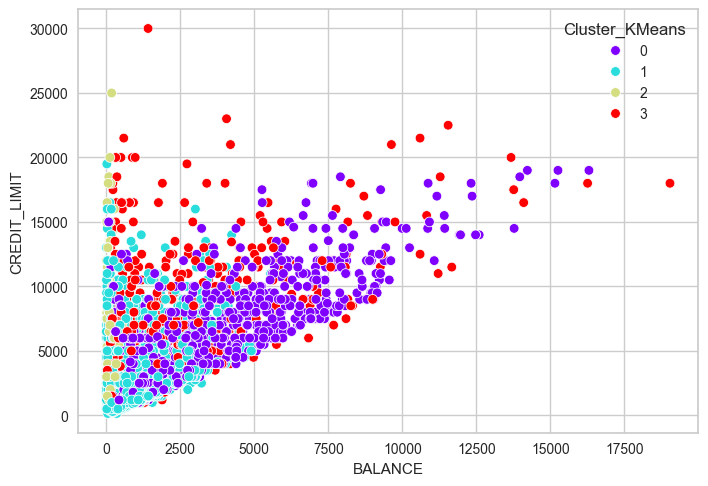

In [290]:
sns.scatterplot(data=df_kmeans, x="BALANCE", y="CREDIT_LIMIT", hue="Cluster_KMeans", palette="rainbow");

- Setiap cluster menunjukkan karakteristik yang berbeda, dengan cluster 1 menunjukkan variasi terbesar dalam batas kredit dan cluster 2 menunjukkan perbedaan yang mencolok antara saldo rendah dan batas kredit tinggi.
- Secara keseluruhan, ada kecenderungan positif antara saldo dan batas kredit, terutama dalam cluster 3, di mana anggota dengan batas kredit tinggi juga memiliki saldo tinggi.
- Model K-Means berhasil mengelompokkan data ke dalam cluster dengan karakteristik yang berbeda, yang dapat membantu dalam analisis lebih lanjut dan pengambilan keputusan berdasarkan profil cluster ini.

#### **c. Rata-rata Nilai Fitur di Setiap Cluster**


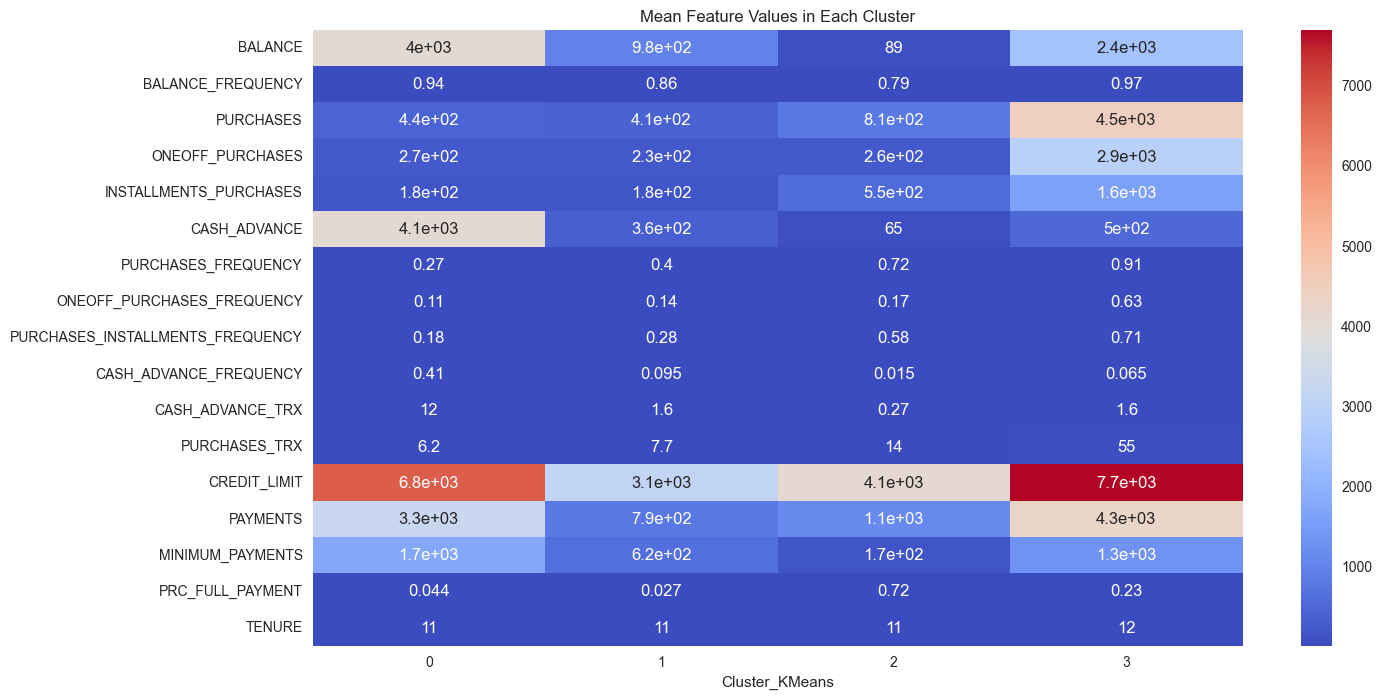

In [291]:
# Rata-rata nilai fitur di setiap cluster
cluster_means = df_kmeans.groupby('Cluster_KMeans').mean()
plt.figure(figsize=(15, 8))
sns.heatmap(cluster_means.T, annot=True, cmap='coolwarm')
plt.title('Mean Feature Values in Each Cluster')
plt.show()


- **Cluster 0**: Cluster ini cenderung memiliki saldo dan batas kredit yang cukup tinggi, serta melakukan pengambilan tunai lebih sering dibandingkan dengan cluster lain.
- **Cluster 1**: Cluster ini terdiri dari anggota dengan saldo dan batas kredit yang rendah, serta pembayaran minimum yang rendah.
- **Cluster 2**: Cluster ini memiliki saldo yang cukup tinggi tetapi melakukan pembelian lebih sedikit.
- **Cluster 3**: Cluster ini terdiri dari anggota dengan saldo, batas kredit, dan jumlah pembelian yang tinggi, menunjukkan bahwa mereka adalah pengguna kartu kredit yang aktif dan memiliki kapasitas kredit yang besar.

#### **d. Distribution of Main Features in Each Cluster**

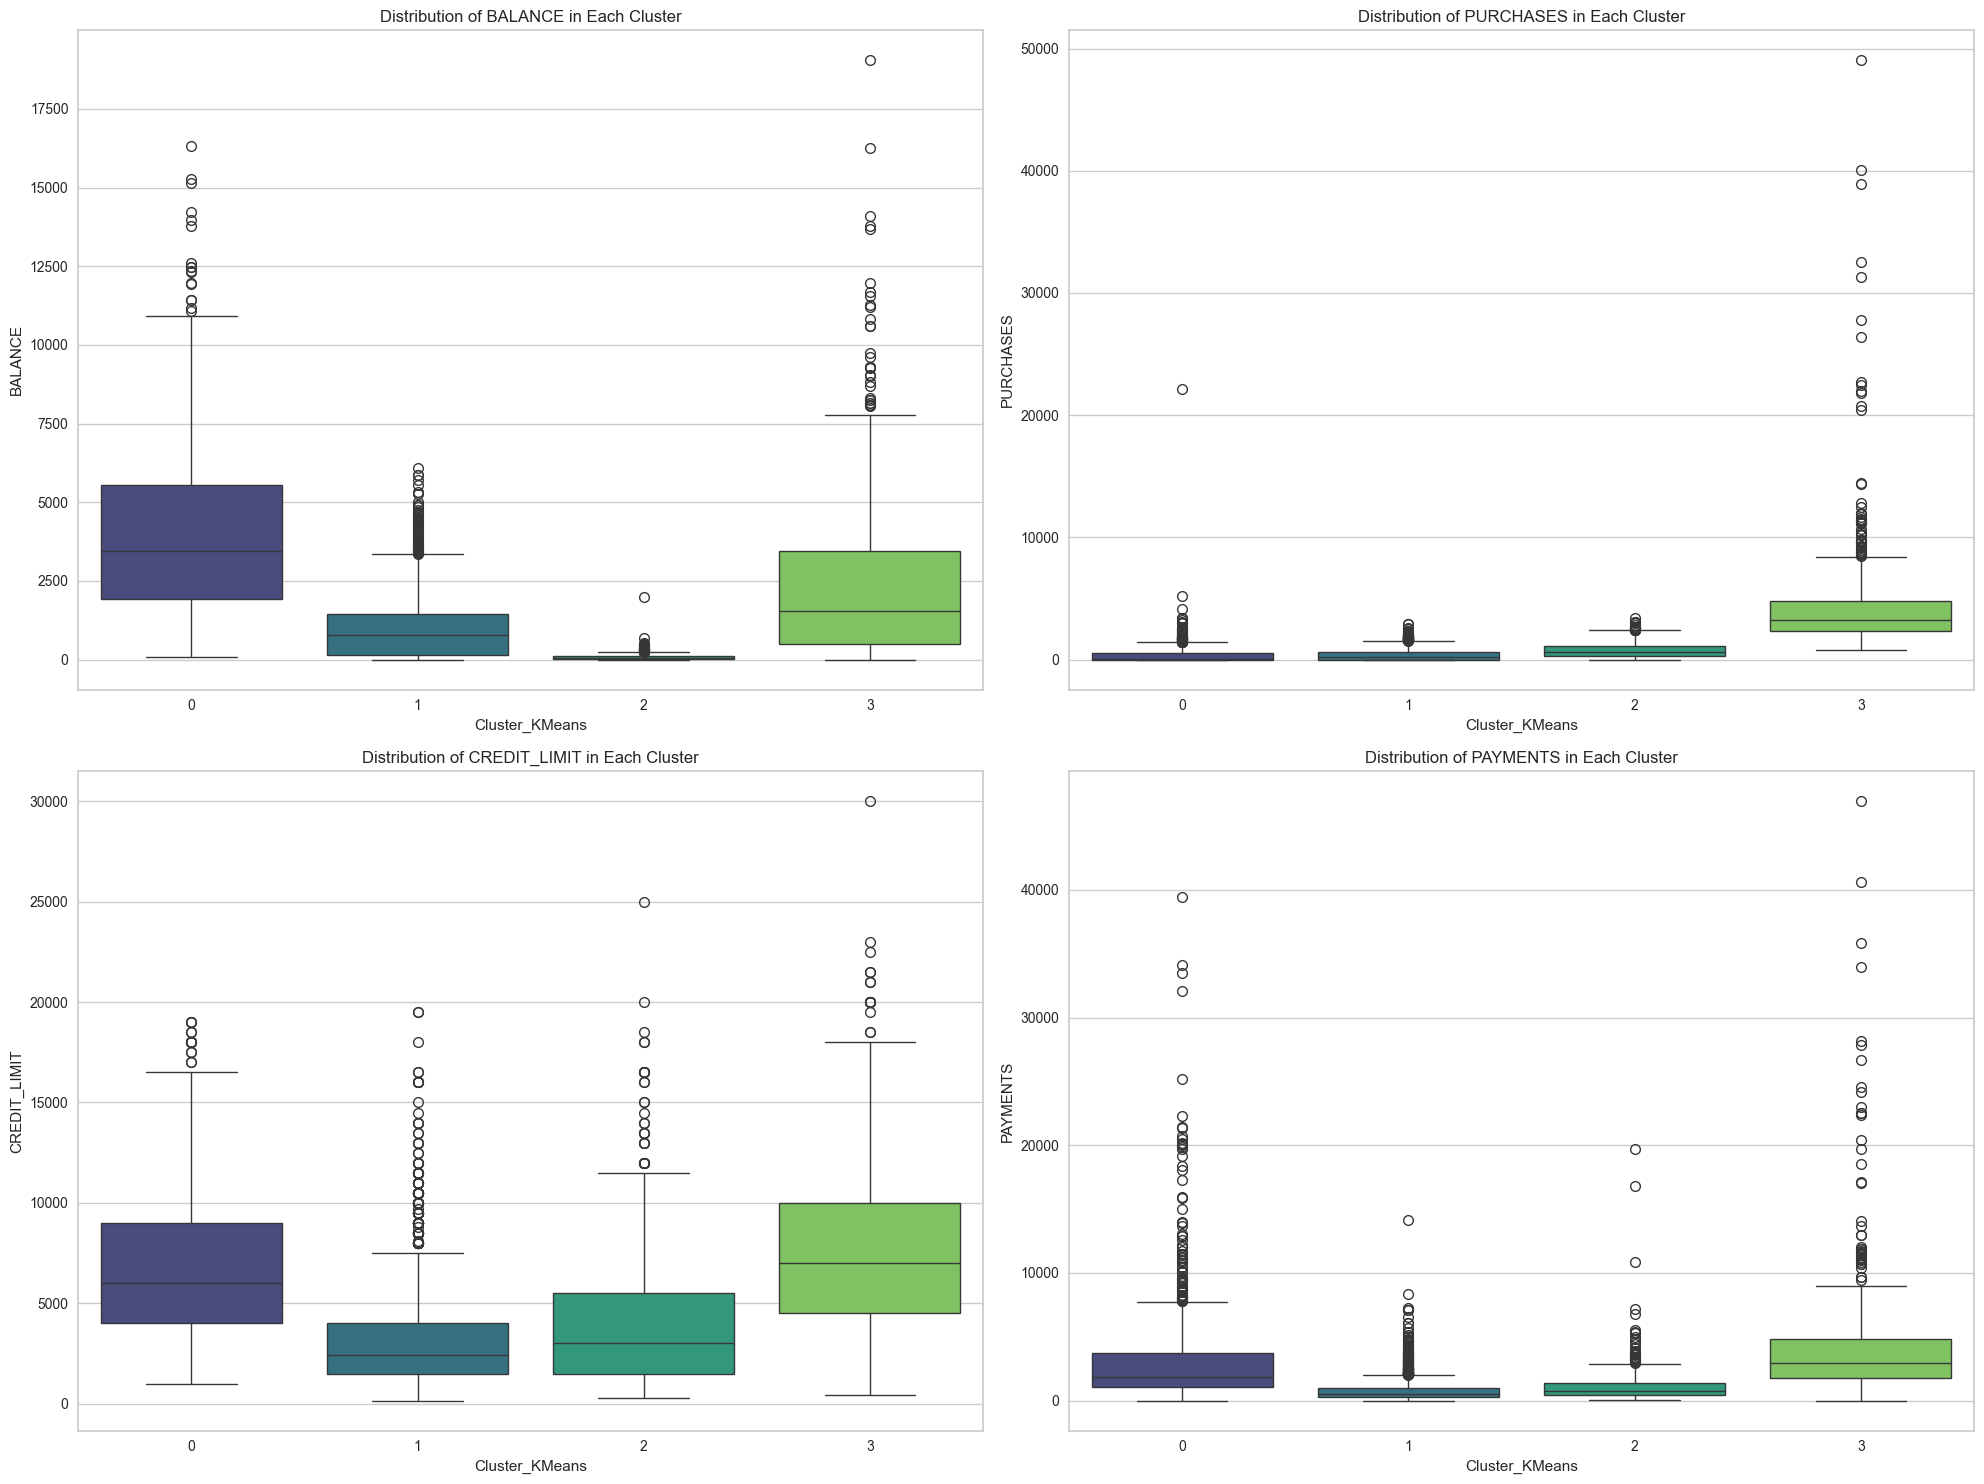

In [292]:
# Boxplot untuk beberapa fitur utama dalam setiap cluster
features_to_plot = ['BALANCE', 'PURCHASES', 'CREDIT_LIMIT', 'PAYMENTS']

plt.figure(figsize=(20, 15))
for i, feature in enumerate(features_to_plot, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x='Cluster_KMeans', y=feature, data=df_kmeans, palette='viridis')
    plt.title(f'Distribution of {feature} in Each Cluster')
plt.tight_layout()
plt.show()


#### **e. Finding Characteristics of Each Cluster**

In [293]:
# Finding the average score from all clusters
df_kmeans.groupby('Cluster_KMeans').mean()

BALANCE  BALANCE_FREQUENCY    PURCHASES  ONEOFF_PURCHASES  \
Cluster_KMeans                                                                  
0               4040.607476           0.944895   444.767341        266.466939   
1                978.084106           0.857170   405.310458        228.573981   
2                 88.792042           0.789126   806.296271        256.957011   
3               2421.297049           0.973185  4474.778294       2895.902611   

                INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
Cluster_KMeans                                                              
0                           178.387237   4067.823406             0.274866   
1                           177.326991    358.275014             0.398373   
2                           549.476364     65.133538             0.718668   
3                          1578.959300    500.103507             0.906783   

                ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
Cluster_KMeans                                                                 
0                                 0.113892                          0.181078   
1                                 0.137174                          0.283219   
2                                 0.169865                          0.578631   
3                                 0.631335                          0.714873   

                CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  \
Cluster_KMeans                                                            
0                             0.413042         11.971466       6.191958   
1                             0.094865          1.603078       7.686108   
2                             0.014831          0.265023      14.006163   
3                             0.064924          1.610922      54.614334   

                CREDIT_LIMIT     PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  \
Cluster_KMeans                                                                  
0                6781.322957  3295.804865       1730.251035          0.044420   
1                3122.787003   789.058799        615.607189          0.026712   
2                4101.391885  1136.853386        173.958002          0.722240   
3                7694.337574  4262.338484       1315.141578          0.229627   

                   TENURE  
Cluster_KMeans             
0               11.378729  
1               11.494127  
2               11.423729  
3               11.894198

**Explanation:**
- Cluster 0 adalah kelompok dengan saldo tinggi dan aktivitas penarikan tunai yang sangat tinggi.
- Cluster 1 memiliki saldo dan pembelian moderat dengan aktivitas penarikan tunai yang lebih rendah.
- Cluster 2 adalah kelompok dengan saldo rendah namun melakukan pembelian dalam jumlah besar dan penarikan tunai rendah.
- Cluster 3 adalah kelompok dengan aktivitas pembelian tertinggi dan saldo yang besar, serta penarikan tunai yang moderat.

Namun, untuk lebih mudah memvisualisasikan karakteristiknya, nilai rata-rata akan diplot di bawah ini

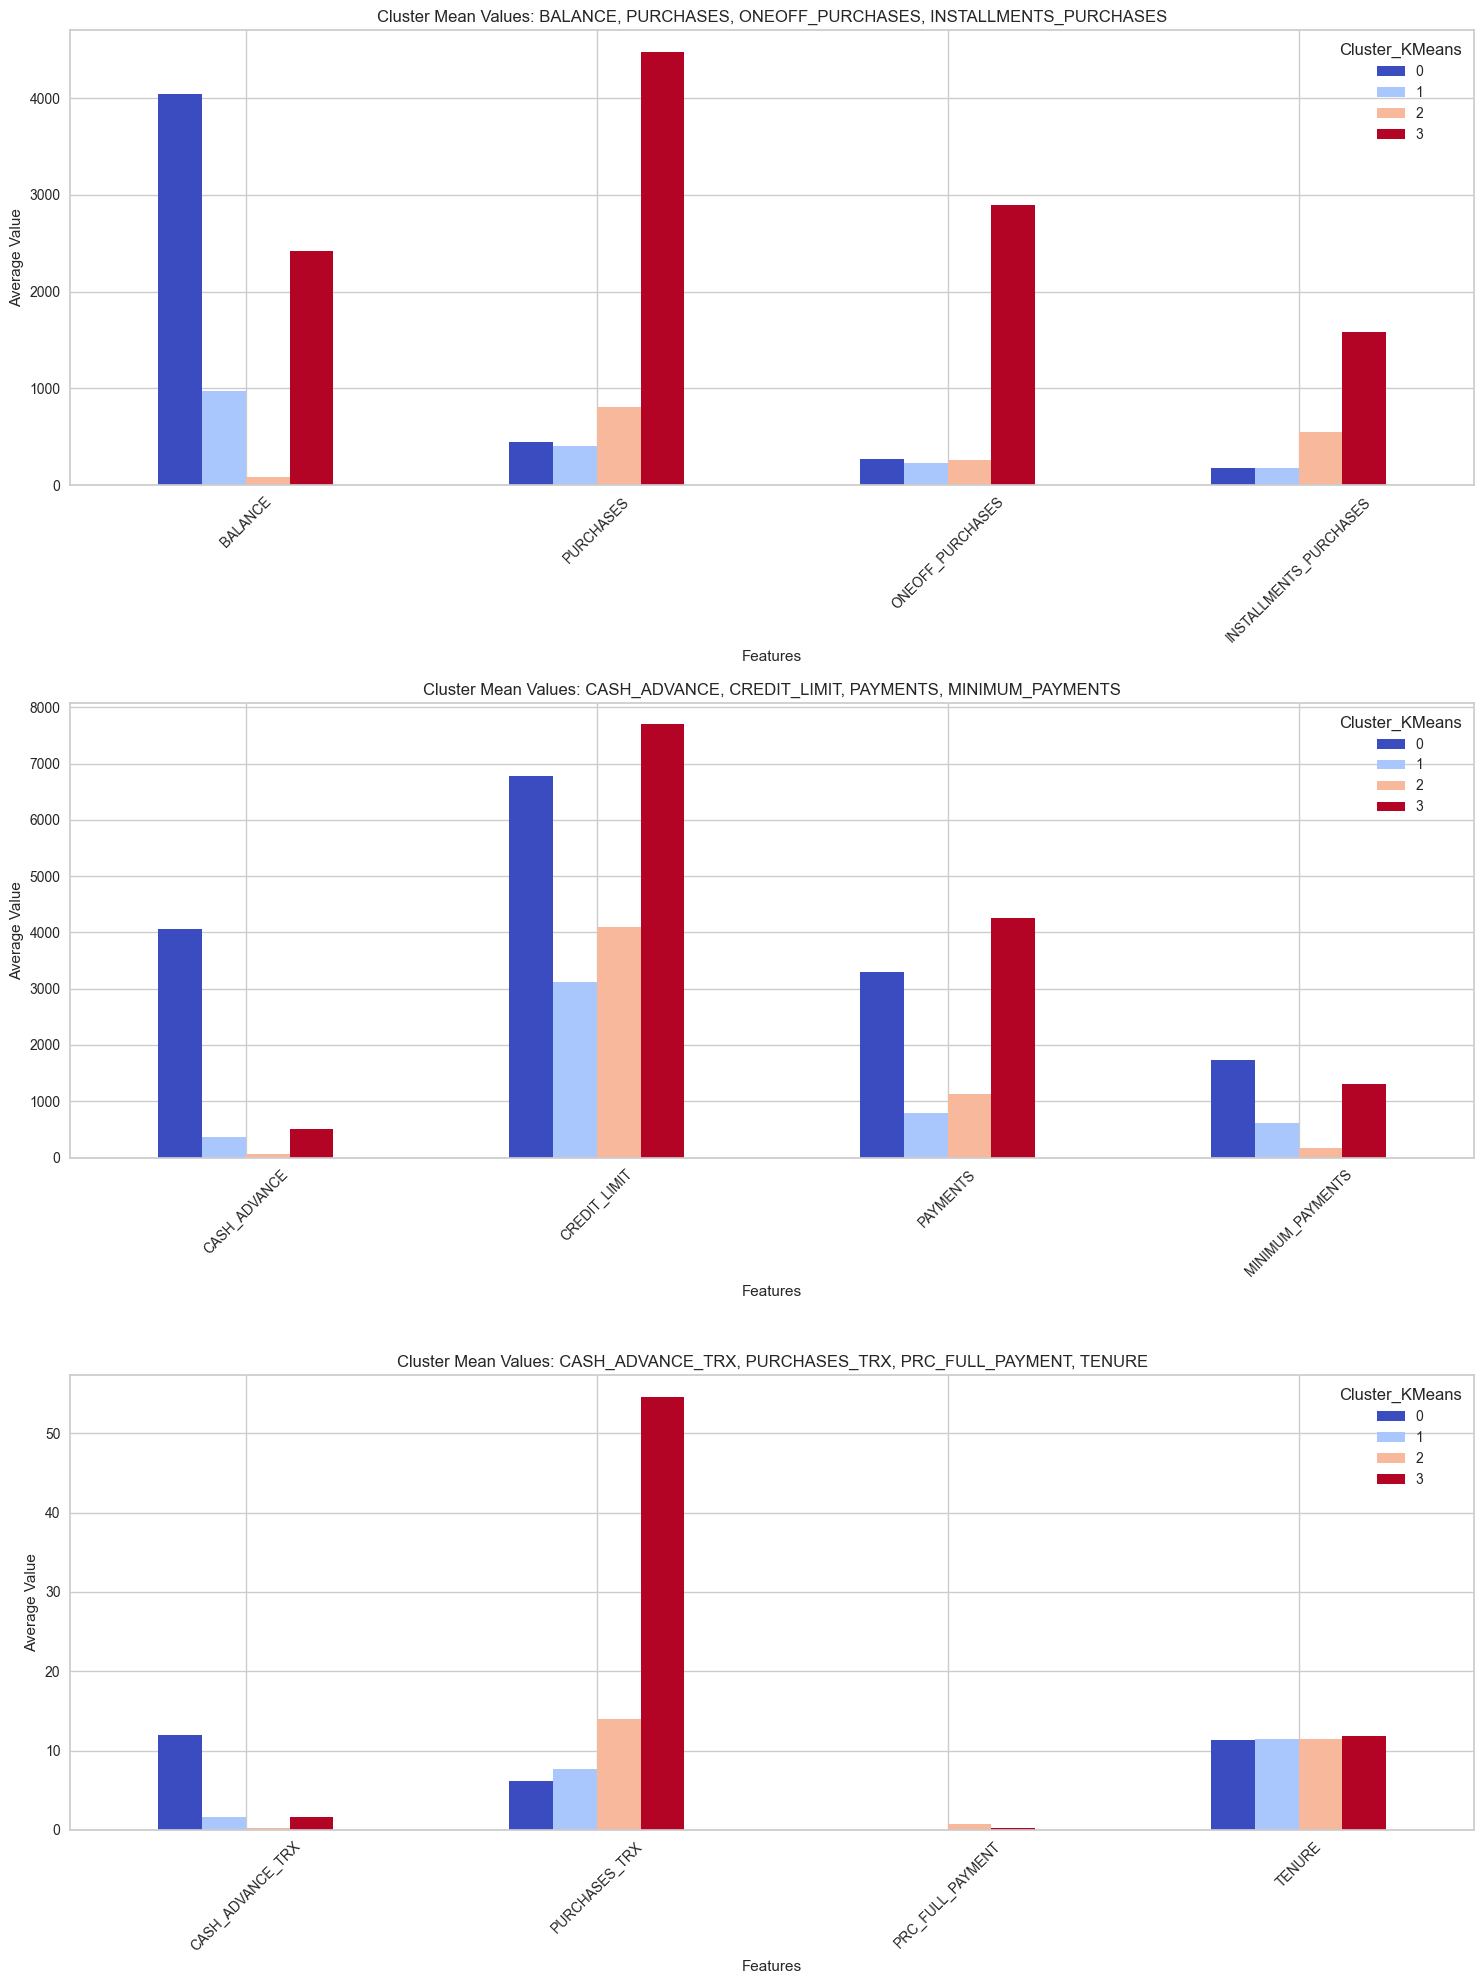

In [294]:
# Define the features for each subplot
feature_groups = {'Group 1': ['BALANCE', 'PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES'],
                  'Group 2': ['CASH_ADVANCE', 'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS'],
                  'Group 3': ['CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'PRC_FULL_PAYMENT', 'TENURE']}

# Calculate the mean of all numerical features for each cluster
cluster_means = df_kmeans.groupby('Cluster_KMeans').mean()

# Create a 3x1 subplot
fig, axes = plt.subplots(3, 1, figsize=(15, 20))
axes = axes.flatten()

# Plotting each group in its own subplot
for i, (title, features) in enumerate(feature_groups.items()):
    cluster_means[features].T.plot(kind='bar', ax=axes[i], colormap='coolwarm')
    axes[i].set_title(f'Cluster Mean Values: {", ".join(features)}')
    axes[i].set_ylabel('Average Value')
    axes[i].set_xlabel('Features')
    axes[i].set_xticklabels(features, rotation=45)

# Show result
plt.tight_layout()
plt.show()


**Explanation:**

Dari hasil analisis clustering ini, dapat disimpulkan bahwa pengguna kartu kredit dapat dikelompokkan berdasarkan pola penggunaan mereka seperti balance, purchases, cash advances, dan payments. Ini memberikan pandangan yang berguna untuk pengelolaan risiko kredit, penawaran produk yang lebih terarah, dan strategi pemasaran yang lebih efektif.

## **J. Model Saving**

Selanjutnya, model K-Means dan file lainnya disimpan menggunakan format `pickle` dan `JSON` untuk testing inference.

In [296]:
# Save trained model
with open('kmeans_model.pkl', 'wb') as model_file:
    pickle.dump(km, model_file)

# Save MinMaxScaler
with open('scaler.pkl', 'wb') as minmax_file:
    pickle.dump(scaler, minmax_file)
    
# Save PCA
with open('pca.pkl', 'wb') as pca_file:
    pickle.dump(pca, pca_file) 

# Save numerical columns
with open('num_cols.json', 'w') as num_std_file:
    json.dump(num_cols, num_std_file)

# Save categorical columns
with open('cat_cols_encoded.json', 'w') as cat_std_file:
    json.dump(cat_cols_encoded, cat_std_file)


## **K. Model Inference**

Akan dilakukan pada file terpisah dengan nama **'P1G6_Set_1_Iznia_Azyati_Inference.ipynb'**.

## **L. Conceptual Problems**

**1. Apakah yang dimaksud dengan inertia pada algoritma K-Means?**    

   **Jawab:**
   
   Inertia pada algoritma K-Means adalah ukuran seberapa baik cluster yang dihasilkan oleh algoritma tersebut. Inertia menghitung jumlah kuadrat dari jarak setiap data point ke centroid cluster terdekatnya. Dengan kata lain, inertia adalah total dalam-cluster sum of squares. Nilai inertia yang lebih rendah menunjukkan bahwa data points lebih dekat ke centroid cluster masing-masing, yang menandakan klasterisasi yang lebih baik.

   Oleh karena itu, memilih jumlah cluster yang tepat (K) melibatkan penyeimbangan nilai inertia dan jumlah cluster. Model yang baik menyeimbangkan antara inertia rendah dan jumlah cluster yang dapat dikelola, karena meningkatkan K akan menurunkan inertia tetapi dapat menyebabkan overfitting.




**2. Jelaskan yang dimaksud dengan Elbow Method (alasan penggunaan, cara penggunaan, kelemahan/kelebihan, dll) !**

   **Jawab:**

   Elbow Method adalah teknik yang umum digunakan untuk menentukan jumlah optimal cluster (k) dalam algoritma K-Means clustering. Metode ini dinamakan demikian karena hasil grafik yang dihasilkan sering kali terlihat seperti siku (elbow).

   **Alasan Penggunaan**
   
   Elbow Method digunakan untuk menentukan jumlah cluster yang tepat sehingga data points dalam cluster memiliki kesamaan yang tinggi dan perbedaan antar cluster yang jelas. Dengan memilih jumlah cluster yang tepat, kita dapat menghindari overfitting (terlalu banyak cluster) atau underfitting (terlalu sedikit cluster).


   **Cara Penggunaan**
   
   - Jalankan Algoritma K-Means: Pertama, jalankan algoritma K-Means untuk berbagai nilai k (misalnya, dari 1 hingga 10).

   - Hitung Inertia: Untuk setiap nilai k, hitung inertia, yaitu total dalam-cluster sum of squares.

   - Plot Grafik Inertia: Buat plot inertia terhadap jumlah cluster (k).
   
   - Identifikasi Elbow Point: Cari titik di grafik di mana penurunan inertia mulai melambat secara signifikan. Titik ini dikenal sebagai "elbow point" dan menunjukkan jumlah optimal cluster.


   **Kelebihan:**

   - Mudah Dipahami: Metode ini sederhana dan mudah dipahami dan untuk diterapkan. 
   - Visualisasi yang Jelas: Grafik inertia memberikan visualisasi yang jelas tentang penurunan inertia seiring bertambahnya jumlah cluster.
   - Efektif untuk Jumlah Cluster yang Kecil hingga Menengah: Elbow Method bekerja baik untuk dataset dengan jumlah cluster yang kecil hingga menengah.
   - Menawarkan pemahaman intuitif tentang pembentukan cluster berdasarkan titik elbow.



**Kelemahan:**

   - Menentukan elbow point sering kali bersifat subjektif yang perlu divalidasi menggunakan metode lain dan dapat bervariasi antar pengguna.
   - Tetapi, dalam beberapa kasus, elbow point mungkin tidak terlihat jelas, membuatnya sulit untuk menentukan jumlah cluster yang optimal.
   - Sensitif terhadap centroid awal, yang dapat mempengaruhi nilai WCSS dan pilihan nilai K optimal.
   - Skalabilitas: Untuk dataset yang sangat besar atau dengan banyak cluster, menghitung inertia untuk berbagai nilai k bisa memakan waktu dan sumber daya komputasi yang besar.

[Reference 1](https://www.codecademy.com/learn/dspath-unsupervised/modules/dspath-clustering/cheatsheet)  
[Reference 2](https://www.analyticsvidhya.com/blog/2021/01/in-depth-intuition-of-k-means-clustering-algorithm-in-machine-learning/) 

## **M. Kesimpulan**

#### **1. EDA**

- **Distribusi Balance dan Purchase**: Sebagian besar pelanggan memiliki saldo (balance) dan pembelian (purchase) yang rendah hingga sedang. Hal ini dapat terlihat dari histogram distribusi yang menunjukkan puncak pada nilai rendah.

- **Preferensi Pembelian**: Distribusi frekuensi pembelian menunjukkan preferensi untuk pembelian bernilai tinggi yang jarang dibandingkan dengan transaksi kecil yang sering. Ini mungkin menunjukkan penggunaan kredit yang strategis untuk pengeluaran besar.

- **Pola Korelasi**: Matriks korelasi menunjukkan hubungan yang kuat antara beberapa variabel. Misalnya, ONEOFF_PURCHASES dan PURCHASES menunjukkan korelasi tinggi, yang mengindikasikan bahwa mereka yang melakukan pembelian besar sekali waktu cenderung memiliki total pembelian yang lebih tinggi. Demikian pula, CASH_ADVANCE dan CASH_ADVANCE_TRX berkorelasi kuat, menunjukkan bahwa pengambilan tunai yang sering mengarah pada jumlah pengambilan tunai yang lebih tinggi.

- **Keberagaman Penggunaan**: Histogram dan scatter plot menyoroti pola penggunaan kartu kredit yang beragam, mulai dari aktivitas pembelian yang sering hingga pengeluaran besar yang jarang. Keberagaman ini mencerminkan perilaku finansial dan preferensi penggunaan kredit yang bervariasi di antara pemegang kartu.


#### **2. Model Performance**

Performansi model clustering yang digunakan, yaitu K-Means, dinilai menggunakan beberapa metrik:

- **Elbow Method**: Mengindikasikan bahwa 4 cluster adalah jumlah yang optimal.

- **Silhouette Score**: Cluster dengan 4 menunjukkan nilai silhouette yang paling tinggi, menunjukkan bahwa ini adalah jumlah cluster yang paling tepat untuk membagi data.

- **Visualisasi Cluster**: Scatter plot dan heatmap menunjukkan bahwa cluster terdefinisi dengan baik dan masing-masing memiliki karakteristik yang jelas.

Model ini secara efektif mengelompokkan pelanggan ke dalam klaster yang berbeda berdasarkan pola penggunaan kartu kredit mereka, menunjukkan kemampuannya untuk mengungkap segmen pelanggan yang bermakna.

**Hasil Segmentasi:**

- Cluster 0: Pengguna yang Bergantung pada Kredit: Pelanggan dengan saldo tinggi secara signifikan, sering melakukan pengambilan tunai, dan pembayaran minimal. Pengguna ini sangat bergantung pada kredit, menunjukkan utang yang lebih tinggi dan risiko finansial.

- Cluster 1: Pengguna Minimalis: Pelanggan dengan saldo rendah dan aktivitas kartu kredit minimal. Kemungkinan pengguna hati-hati yang menghindari utang dan lebih suka pengeluaran kecil yang terkontrol.

- Cluster 2: Pengguna dengan Pembelian Tinggi: Pelanggan dengan pengeluaran tinggi di berbagai kategori, termasuk pembelian sekali waktu yang besar. Mereka sering menggunakan kredit untuk pengeluaran substansial.

- Cluster 3: Pengguna yang Disiplin Secara Finansial: Pelanggan dengan saldo moderat hingga tinggi, pembayaran substansial, dan ketergantungan rendah pada pengambilan tunai. Mereka mengelola kredit mereka dengan bertanggung jawab.

**Insight Bisnis Berdasarkan Klaster:**
1. Cluster 0: Tawarkan program manajemen utang dan konseling keuangan.
2. Cluster 1: Edukasi tentang manfaat penggunaan kredit dan membangun riwayat kredit.
3. Cluster 2: Berikan reward eksklusif dan program loyalitas.
4. Cluster 3: Berikan insentif untuk perilaku bertanggung jawab dengan diskon pada layanan keuangan.



#### **3. Model Improvement**

Beberapa langkah telah dilakukan:

- **Imputasi Missing Values**: Menggunakan imputasi median untuk menangani missing values, khususnya pada kolom MINIMUM_PAYMENTS yang memiliki distribusi sangat miring.

- **Handling Outliers**: Menerapkan winsorization untuk mengurangi pengaruh outliers yang ekstrim pada data.

- **Feature Scaling**: Menggunakan MinMaxScaler untuk menormalisasi data numerik, memastikan bahwa setiap fitur memiliki skala yang sama untuk clustering yang lebih efektif.

- **PCA**: Mengurangi dimensi data hingga 7 komponen untuk mempertahankan 90% varians dari data asli, yang membantu dalam meningkatkan kinerja dan interpretabilitas model clustering.


Untuk peningkatan model, beberapa langkah mungkin perlu dilakukan:

1. Strategi Inisialisasi yang Ditingkatkan: Menjelajahi alternatif untuk K-Means++ untuk meningkatkan inisialisasi cluster.

2. Metrik Validitas Cluster: Terapkan metrik tambahan seperti indeks Davies-Bouldin atau Dunn untuk mengevaluasi kualitas cluster secara lebih komprehensif.



#### **4. Business Insight**

- **Cluster Identifikasi:** Dari analisis clustering, empat cluster utama diidentifikasi. Masing-masing cluster memiliki karakteristik yang berbeda dalam hal saldo, batas kredit, dan pola pembelian.

    - Cluster 0: Menunjukkan pelanggan dengan saldo dan pembayaran tinggi tetapi batas kredit sedang.
    - Cluster 1: Pelanggan dengan saldo rendah, frekuensi pembelian sedang, dan batas kredit rendah.
    - Cluster 2: Pelanggan dengan saldo dan batas kredit sangat rendah, tetapi melakukan pembelian dengan jumlah yang cukup besar.  
    - Cluster 3: Pelanggan dengan saldo, batas kredit, dan pembelian sangat tinggi.


- **Customer Segmentation:** Segmentasi ini memungkinkan perusahaan untuk menargetkan strategi pemasaran yang lebih tepat sasaran. Misalnya, menawarkan produk premium kepada Cluster 3 atau mengembangkan program loyalitas untuk Cluster 0.


**Kesimpulan Akhir**

Model K-Means berhasil mengelompokkan pelanggan kartu kredit ke dalam klaster yang berbeda berdasarkan pola penggunaan mereka.

Dengan proses analisis ini, perusahaan mendapatkan pemahaman yang lebih baik tentang karakteristik dan segmentasi pelanggan mereka. Hasil clustering memungkinkan perusahaan untuk menargetkan kelompok pelanggan dengan strategi pemasaran yang disesuaikan, meningkatkan efektivitas kampanye, dan mengoptimalkan penawaran produk. Dengan terus mengimprovisasi model melalui teknik yang lebih canggih dan data yang lebih kaya, perusahaan dapat mempertahankan keunggulan kompetitif dan meningkatkan kepuasan pelanggan secara keseluruhan.